<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EC%8B%A0%EB%8F%84%EA%B3%A02024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법A: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt


#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# 첫 5줄을 봅니다.
df.tail(2)

,학번,이름,지역,대학,지원시기,전형명,계열,모집단위,1단계,최종,...,한국사_백분위,한국사_등급,제2외국어_과목명,제2외국어_원점수,제2외국어_표준점수,제2외국어_백분위,제2외국어_등급,표점합_수능,백분위_수능,등급_수능
863,30812,NaN,서울,정화예술대학교,수시1차,일반,공통,건반(야),NaN,합,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,30815,NaN,서울,서일대학교,수시1차,일반,예체능,영화방송공연예술학과(연기예술전공),NaN,합,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,240.0,20.666667,6.125


In [ ]:
#수능 응시자: 161명

df_number = df.drop_duplicates('학번')
df_number = len(df_number)
print(df_number)

161


In [ ]:
#1. 서울주요대(1개대) 대학별 합격자수

import os
import pandas as pd

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대',
       '건국대', '동국대', '홍익대', '숙명여대', '국민대', '숭실대', '세종대', '광운대', '명지대', '상명대', '가천대(글로벌)']

# 서울 주요대학 수시합격자수 출력
print("\n***2024학년도 SI고 합격건수***")

total_accepted = 0  # Variable to store the total number of accepted students

for u in range(len(uni)):
    df_u = df[(df.대학 == uni[u]) & (df.최종 == '합')]
    accepted_count = len(df_u['대학'])
    total_accepted += accepted_count
    print(uni[u], str(accepted_count) + "건")

print(f"\n총 합격자 수: {total_accepted}건")


***2024학년도 SI고 합격건수***
서울대 0건
연세대 1건
고려대 1건
서강대 3건
성균관대 4건
한양대 1건
중앙대 0건
경희대 1건
한국외대 0건
서울시립대 1건
이화여대 4건
건국대 0건
동국대 0건
홍익대 0건
숙명여대 0건
국민대 6건
숭실대 0건
세종대 3건
광운대 3건
명지대 1건
상명대 7건
가천대(글로벌) 2건

총 합격자 수: 38건


In [ ]:
#2. 서울주요대 합격자 명단

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)']


# 데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        print("-----------------------------------------\n")

연세대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

고려대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

서강대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

성균관대 합격자수 - 수시: 4명, 정시: 0명
-----------------------------------------

한양대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

경희대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

서울시립대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

이화여대 합격자수 - 수시: 4명, 정시: 0명
-----------------------------------------

국민대 합격자수 - 수시: 6명, 정시: 0명
-----------------------------------------

세종대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

광운대 합격자수 - 수시: 3명, 정시: 0명
-----------------------------------------

명지대 합격자수 - 수시: 1명, 정시: 0명
-----------------------------------------

상명대 합격자수 - 수시: 7명, 정시: 0명
-----------------------------------------

가천대(글로벌) 합격자수 - 수시: 2명, 정시: 0명
-----------------------------------------



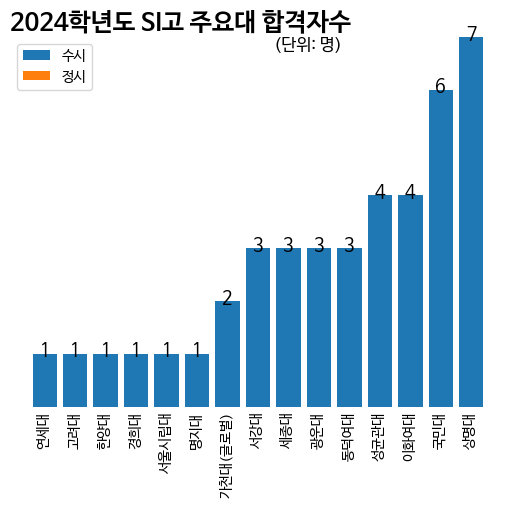

In [ ]:
#3. 서울주요대 합격자수 막대그래프(세로)

import pandas as pd
import matplotlib.pyplot as plt


#표시할 대학리스트
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대',
       '숙명여대', '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)', '동덕여대']


# 데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# '지원시기'열의 값 변경: 가,나
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시',
                                       '수시1차': '수시', '수시2차': '수시'})

# 빈 리스트
uni_new = []
num_su = []
num_je = []


# 리스트에 새로운 대학리스트와, 수시합격자, 정시합격자를 담기
for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['지원시기', '학번', '대학', '최종']]
    num_su_u = len(df_u[df_u['지원시기'] == '수시'])
    num_je_u = len(df_u[df_u['지원시기'] == '정시'])


    if num_su_u >= 1 or num_je_u >= 1:  # '지원시기'열의 값이 1 이상일 때만 값을 표시
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        #print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")
        #print("-----------------------------------------\n")


# 지원시기가 1 이상인 데이터만 사용
num_su = [su for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
num_je = [je for su, je in zip(num_su, num_je) if su >= 1 or je >= 1]
uni_new = [uni for uni, su, je in zip(uni_new, num_su, num_je) if su >= 1 or je >= 1]


if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph
    fig, ax = plt.subplots()
    ax.bar(uni_new, num_su, label='수시')
    ax.bar(uni_new, num_je, bottom=num_su, label='정시')


    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        if su >= 1:
            ax.text(i, su+0.05, su, ha='center', va='center', fontsize=13)
        if je >= 1:
            ax.text(i, su + je+0.02, je, ha='center', va='center', fontsize=13)


    # 범례
    ax.legend()

    # 그래프 제목
    ax.set_title('2024학년도 SI고 주요대 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.6, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)


    # X축 눈금(ticks) 제거
    ax.tick_params(axis='x', which='both', length=0)


    plt.xticks(rotation= 90)  # x축 45도 회전
    plt.box(False)  # 테두리 박스 제거
    plt.yticks([])  # y축 제거

    path1 = '/content/drive/MyDrive/python/sindo/result_png/'
    path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


    plt.savefig(f'{path1}pass_2024_신도고_합격자막대그래프.png')
    plt.savefig(f'{path2}pass_2024_신도고_합격자막대그래프.pdf')
    plt.show()
else:
    print("아쉽게도 그래프를 그릴 합격자가 없습니다.")

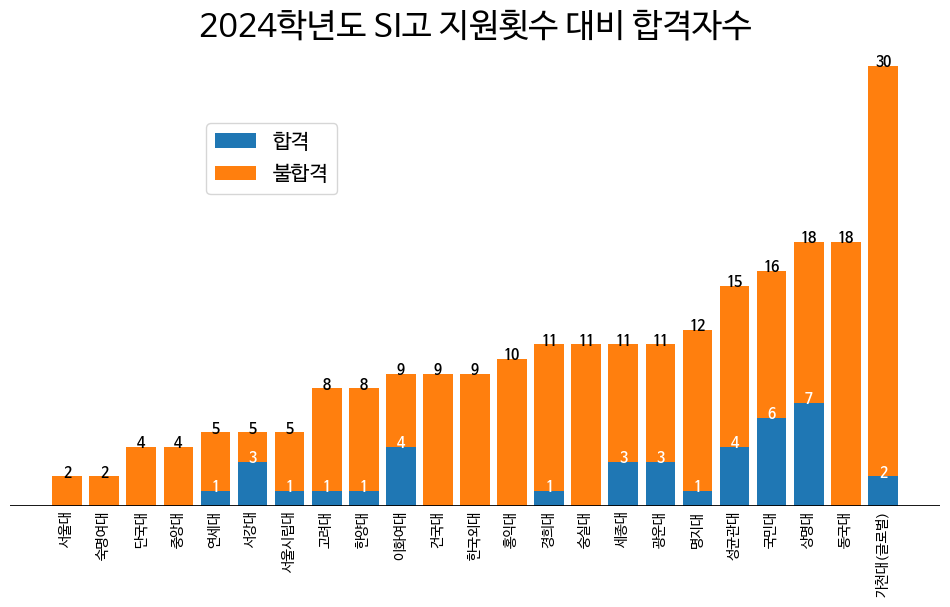

In [ ]:
#4. 서울주요대 합격자 및 불합격자 누적 막대그래프

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대',
       '건국대', '동국대', '홍익대','숙명여대', '국민대', '숭실대', '세종대', '단국대', '광운대', '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)']


# create a new DataFrame containing the number of applications and acceptance for each university and sort it in ascending order by number of applications
num_applications = []
num_acceptance = []
for u in uni:
    uni_admissions = df[df['대학'] == u]
    num_app = len(uni_admissions)
    num_acc = len(uni_admissions[uni_admissions['최종'] == '합'])
    num_applications.append(num_app)
    num_acceptance.append(num_acc)

admission_df = pd.DataFrame({'대학': uni, '지원건수': num_applications, '합격건수': num_acceptance})


# 빈도가 0인 경우 해당 label을 x축 label에서 제거
admission_df = admission_df[admission_df['지원건수'] != 0]

# 그래프를 오름차순으로 정렬하기
admission_df = admission_df.sort_values('지원건수')


# create a vertical stacked bar plot of the number of applications and acceptance
plt.figure(figsize=(12,6))
plt.bar(x='대학', height='합격건수', data=admission_df, bottom=0, label='합격')
plt.bar(x='대학', height= admission_df['지원건수']- admission_df['합격건수'], data=admission_df, bottom=admission_df['합격건수'],
        label='불합격')


plt.xticks(rotation=90, ha='center')
plt.title('2024학년도 SI고 지원횟수 대비 합격자수', fontsize=24)

# add labels on top of the bars for the number of accepted applicants
for i, v in enumerate(admission_df['합격건수']):
    if v > 0:
        plt.text(i, v, str(v), color='white', ha='center', fontweight='bold')  #글자색 white
        #plt.text(i, v, str(v), color='black', ha='center', fontweight='bold') #글자색 black

for a, b in enumerate(admission_df['지원건수']):
    if b > 0:
        plt.text(a, b, str(b), color='black', ha='center', fontweight='bold')

# modify the y-tick range to start from 1 instead of 0
plt.yticks(np.arange(1, 21, 2))

# y축 제거
plt.yticks([])

# remove ticks and spines from the y-axis and top x-axis
plt.tick_params(axis='y', which='both', length=0)  # remove ticks from y-axis
#plt.tick_params(axis='x', which='both', length=0, top=False)  # remove ticks from top x-axis
plt.gca().spines['top'].set_visible(False)  # remove spine from top x-axis
plt.gca().spines['right'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['left'].set_visible(False)  # remove spine from right y-axis
plt.gca().spines['bottom'].set_visible(False)  # remove spine from right y-axis

# create a horizontal line on the x-axis
plt.axhline(y=0, color='black', linewidth=2)

# move the legend to the right and adjust its position
plt.legend(fontsize = 15, loc='upper left', bbox_to_anchor=(0.2, 0.85))

# X축 눈금(ticks) 제거
plt.tick_params(axis='x', which='both', length=0)
# adjust the spacing of the plot to make room for the legend
#plt.subplots_adjust(right=0.75)

#저장
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path1}pass_2024_신도고_지원건수대비합격.png')
plt.savefig(f'{path2}pass_2024_신도고_지원건수대비합격.pdf')

plt.show()

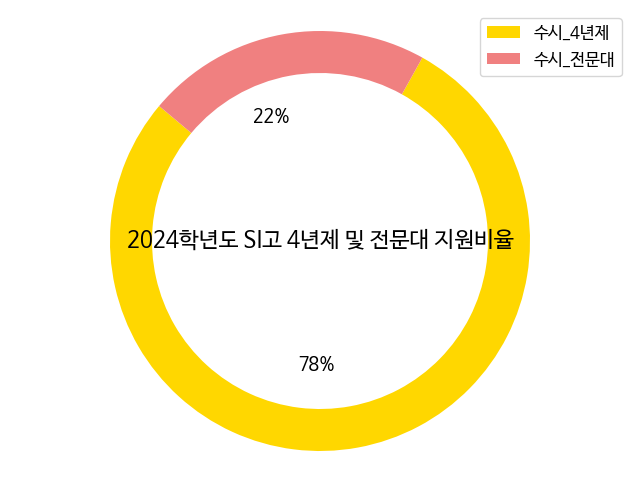

In [ ]:
#5. 수시정시 4년제/전문대 지원비율 도넛차트

import pandas as pd
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시_전문대', '수시2차': '수시_전문대', '수시': '수시_4년제'})


# 변경된 '지원시기'열의 값으로 groupby하여 빈도 계산
frequency = df.groupby('지원시기').size().reset_index(name='빈도')


# 각 항목별 비율 계산하여 '비율' 열에 저장
frequency['비율(%)'] = (frequency['빈도'] / frequency['빈도'].sum() * 100).astype(int)


# 데이터프레임에서 '지원시기'와 '빈도' 열 추출
labels = frequency['지원시기']
sizes = frequency['빈도']
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.02, 0, 0)  # 각 조각이 도넛에서 얼마나 떨어져 있는지 설정



# Ensure that explode has the same length as sizes
if len(explode) != len(sizes):
    explode = tuple(0 for _ in sizes)  # Set all explode values to 0 if lengths don't match


# 도넛 차트 생성
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.2))
plt.axis('equal')  # 동그랗게 만들기


# labels를 도넛 차트 위에 표시
plt.legend(wedges, labels, loc="best", fontsize=12)


# 비율(%)을 정수로 표시
for autotext in autotexts:
    autotext.set_text('{:.0f}%'.format(float(autotext.get_text().strip('%'))))



# 비율(%)의 글자 크기 확대 및 위치 조정
for autotext in autotexts:
    autotext.set_fontsize(13)
    autotext.set_position((autotext.get_position()[0] - 0.21, autotext.get_position()[1] ))
    autotext.set_horizontalalignment('left')


# '수시_4년제'에 해당하는 텍스트 위치 변경
for i, label in enumerate(labels):
    if label == '수시':
        autotexts[i].set_position((autotexts[i].get_position()[0], autotexts[i].get_position()[1] ))  # 수동으로 위치 조정

# 제목 추가
plt.text(0, 0, '2024학년도 SI고 4년제 및 전문대 지원비율', fontsize=16, ha='center', va='center')


#저장
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path1}pass_2024_신도고_수시정시지원비율.png')
plt.savefig(f'{path2}pass_2024_신도고_수시정시지원비율.pdf')

plt.show()

In [7]:
#지원시기를 항목별로 빈도계산하기
df_freq = df['지원시기'].value_counts()
df_freq

,count
지원시기,
수시,681
수시1차,152
수시2차,32


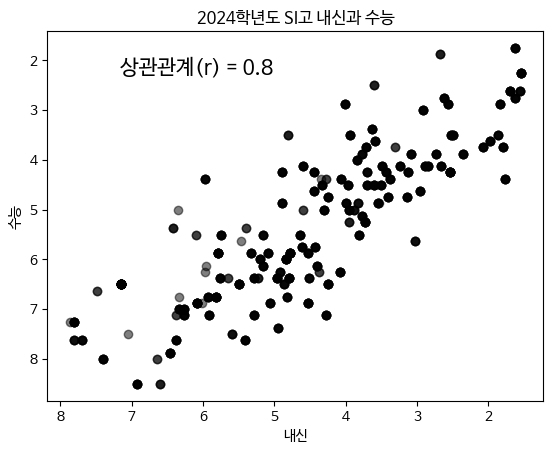

In [ ]:
#6. 내신과 수능과 상관관계A: 산포도

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Drop rows with any NaN values in '전과목' or '등급_수능' columns
df = df.dropna(subset=['전과목', '등급_수능'])


# Extract '전과목' and '등급_수능' columns
x = df['전과목'].values
y = df['등급_수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2024학년도 SI고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


#그래프 저장
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path1}pass_2024_신도고_내신수능산포도.png')
plt.savefig(f'{path2}pass_2024_신도고_내신수능산포도.pdf')

plt.show()

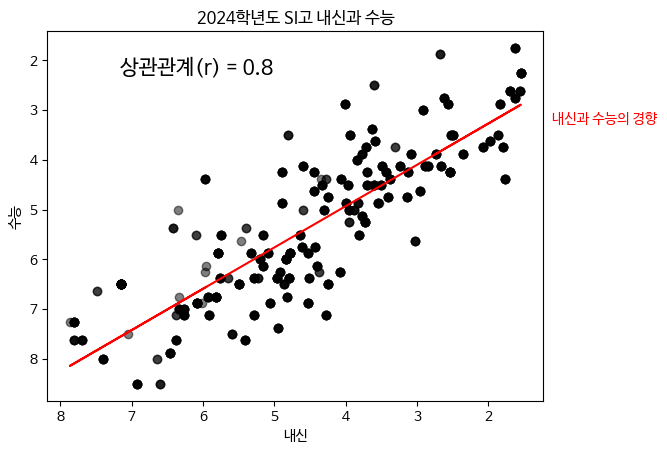

In [ ]:
#7-1. 내신과 수능과 상관관계B: 산포도에 회귀선(추세선) 표시


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Drop rows with any NaN values in '전과목' or '등급_수능' columns
df = df.dropna(subset=['전과목', '등급_수능'])

# Extract '전과목' and '등급_수능' columns
x = df['전과목'].values
y = df['등급_수능'].values

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create the scatter plot
plt.scatter(x, y, alpha=0.5, c='black')
plt.title('2024학년도 SI고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Calculate linear regression line
m, b = np.polyfit(x, y, 1)
# Add linear regression line to scatter plot
plt.plot(x, m*x + b, color='red')


# Add text for the regression line
plt.text(np.median(x)- 3.3, m*np.median(x) + b - 2, '내신과 수능의 경향', color='red')


# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'

# 그래프 저장
plt.savefig(f'{path1}pass_2024_신도고_내신수능산포도_회귀선.png')
plt.savefig(f'{path2}pass_2024_신도고_내신수능산포도_회귀선.pdf')

plt.show()

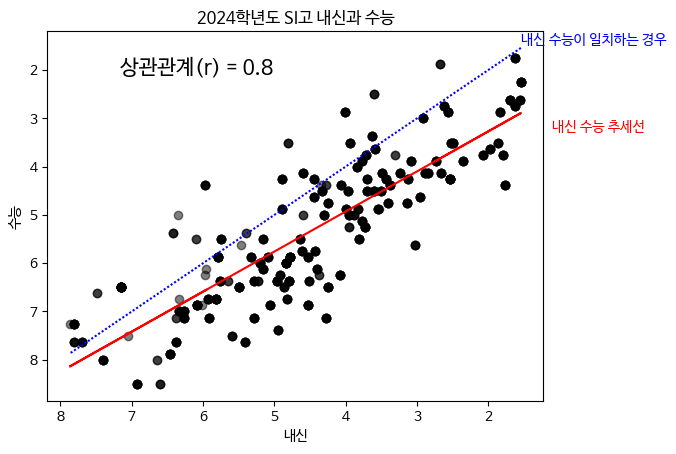

In [ ]:
#7-2. 내신과 수능과 상관관계C: 산포도에 회귀선(추세선)과 1:1대응 직선

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Drop rows with any NaN values in '전과목' or '등급_수능' columns
df = df.dropna(subset=['전과목', '등급_수능'])

# Extract '전과목' and '등급_수능' columns
x = df['전과목'].values
y = df['등급_수능'].values

# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]

# Create the scatter plot
plt.scatter(x, y, alpha=0.5, c='black')
plt.title('2024학년도 SI고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.1f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Calculate linear regression line
m, b = np.polyfit(x, y, 1)
# Add linear regression line to scatter plot
plt.plot(x, m*x + b, color='red')


# Add text for the regression line
plt.text(np.median(x)- 3.3, m*np.median(x) + b - 2, '내신 수능 추세선', color='red')

# Add a 1:1 line
plt.plot([min(x), max(x)], [min(x), max(x)], color='blue', linestyle='--', dashes=[1, 1]) # 1:1 대응 직선 추가



# Add text for the 1:1 line
plt.text(min(x), min(x), '내신 수능이 일치하는 경우', color='blue', verticalalignment='bottom')

# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'

# 그래프 저장
plt.savefig(f'{path1}pass_2024_신도고_내신수능산포도_회귀선_일대일대응선.png')
plt.savefig(f'{path2}pass_2024_신도고_내신수능산포도_회귀선_일대일대응선.pdf')

plt.show()


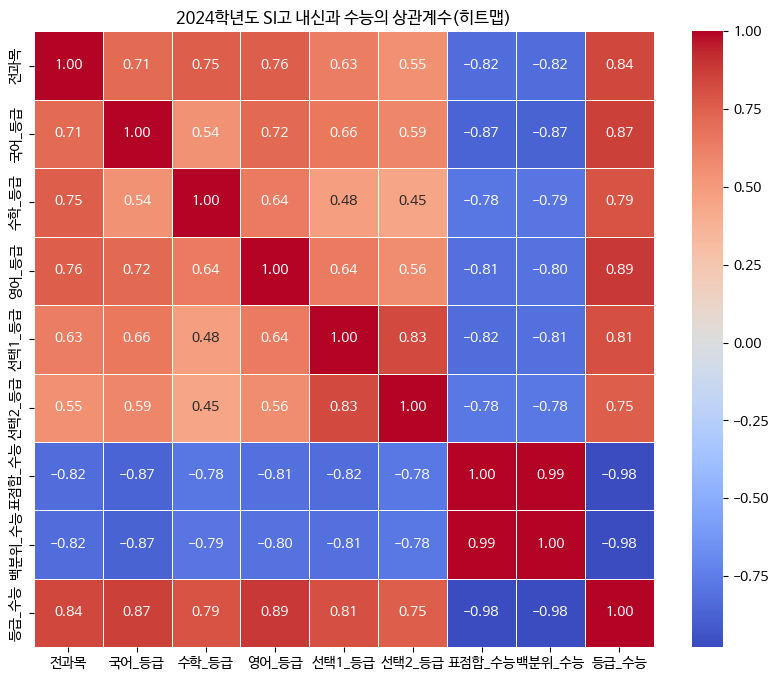

In [ ]:
#8. 내신과 수능과 상관관계(히트맵)


import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합_수능',  '백분위_수능',  '등급_수능']]


# 상관계수 계산
corr = df_heatmap.corr()


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('2024학년도 SI고 내신과 수능의 상관계수(히트맵)')


# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path1}pass_2024_신도고_히트맵상관계수.png')
plt.savefig(f'{path2}pass_2024_신도고_히트맵상관계수.pdf')

plt.show()

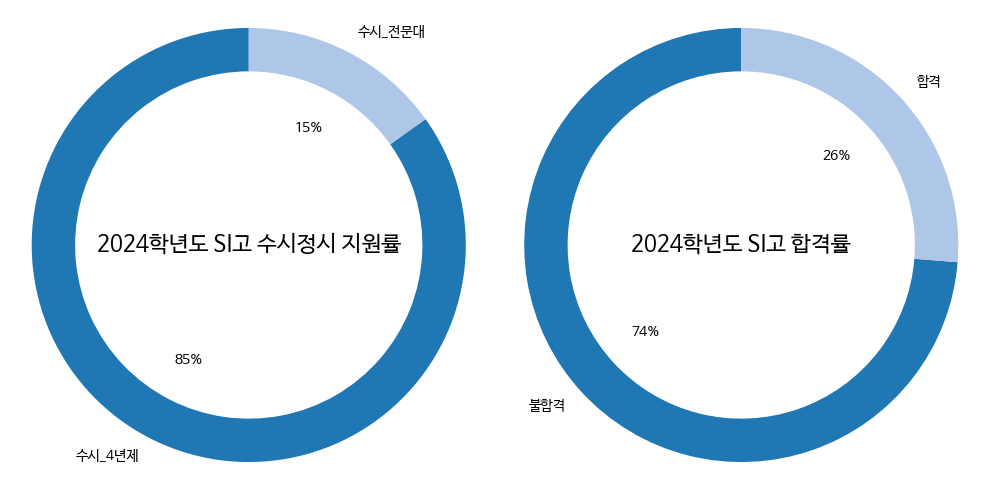

In [ ]:
#9. 수시정시 지원률과 합격률 도넛차트

import pandas as pd
import matplotlib.pyplot as plt



# 조건에 따라 '지원시기'열의 값 변경
df['지원시기'] = df['지원시기'].replace({'가': '정시', '나': '정시', '다': '정시', '정시1차':'정시',
                                       '수시1차': '수시_전문대', '수시2차': '수시_전문대', '수시': '수시_4년제'})


# '지원시기'별 비율 계산
지원시기_비율 = (df['지원시기'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환
labels = 지원시기_비율.index


# '최종' 열의 값이 '합'인 경우는 '합격', '불'인 경우는 '불합격'으로 변경
#df['최종'] = df['최종'].apply(lambda x: '합격' if x == '합' else '불합격')


# '최종' 열의 값을 '합격', '불합격'으로 직접 변경
df['최종'] = df['최종'].replace({'합': '합격', '불': '불합격'})


# '합격'과 '불합격'별 비율 계산
최종_비율 = (df['최종'].value_counts(normalize=True) * 100).astype(int)  # 정수로 변환 후 퍼센트로 변환


# '지원시기' 도넛 차트
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(지원시기_비율, labels=labels, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.2))
# 제목 추가
plt.text(0, 0, '2024학년도 SI고 수시정시 지원률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기



# 지원건수 대비 합격률 도넛 차트
plt.subplot(1, 2, 2)
plt.pie(최종_비율, labels=최종_비율.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors, wedgeprops=dict(width=0.2))
plt.text(0, 0, '2024학년도 SI고 합격률', fontsize=16, ha='center', va='center')
plt.axis('equal')  # 동그랗게 만들기

plt.tight_layout()  # subplot 간 간격 조절


# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path1}pass_2024_신도고_수시정시합격률.png')
plt.savefig(f'{path2}pass_2024_신도고_수시정시합격률.pdf')
plt.show()

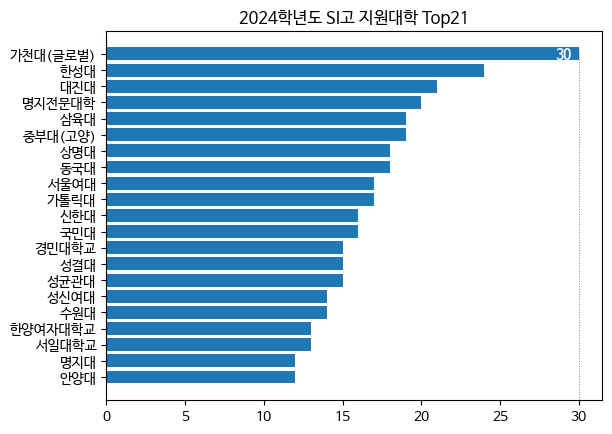

In [ ]:
#10. 지원대학 막대그래프

import pandas as pd
import matplotlib.pyplot as plt


# 데이터 불러오기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

# Filter the rows based on the frequency of the "대학" column
freq = df['대학'].value_counts()
freq = freq[freq >= 12]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
# 저장 경로 설정
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.title(f"2024학년도 SI고 지원대학 Top{freq_num}")
plt.savefig(f'{path1}2024uni_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path2}2024uni_preferred.pdf', bbox_inches='tight')
plt.show()

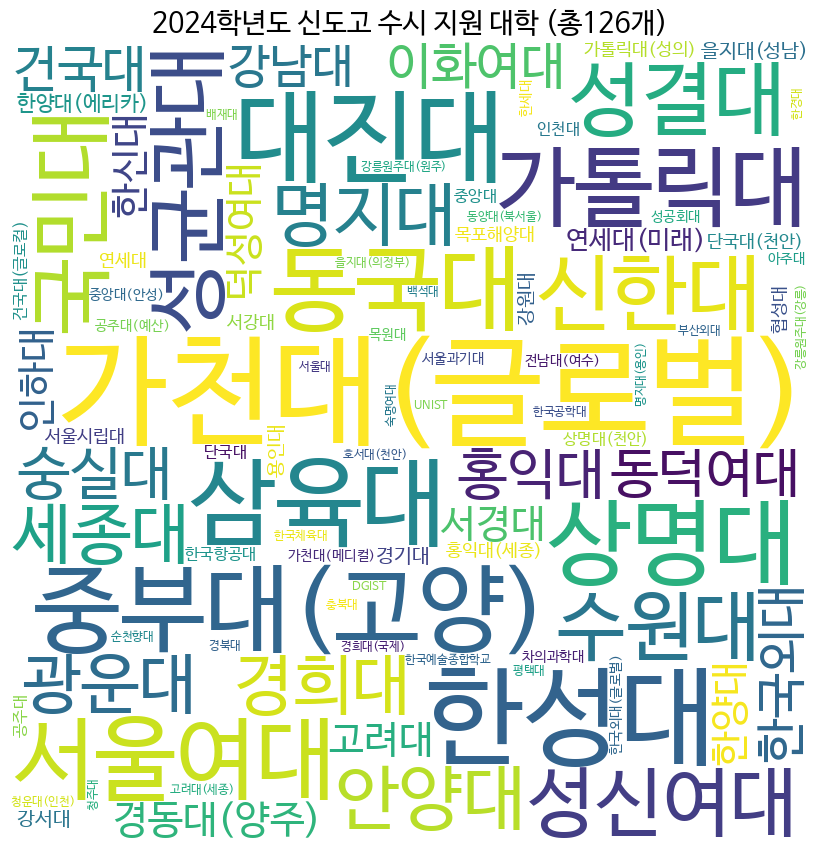

In [ ]:
#11.지원대학 워드클라우드(wordcloud)

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


#지원시기: 수시
df_apply = df[df.지원시기  == '수시']



#중복제외한 대학수
df_dup = df_apply.drop_duplicates('대학')
df_freq = len(df_dup['대학'])



#결과를 하나로 고정
random.seed(42)  # set the random seed



wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df_apply['대학'].value_counts())


fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} 신도고 수시 지원 대학 (총{df_freq}개)", fontsize=20)

path = '/content/drive/MyDrive/python/sindo/result_wordcloud/'
pdf_path = f'{path}2024학년도_신도고_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

wordcloud.to_file(f'{path}2024학년도_신도고_wordcloud.png')

plt.show()

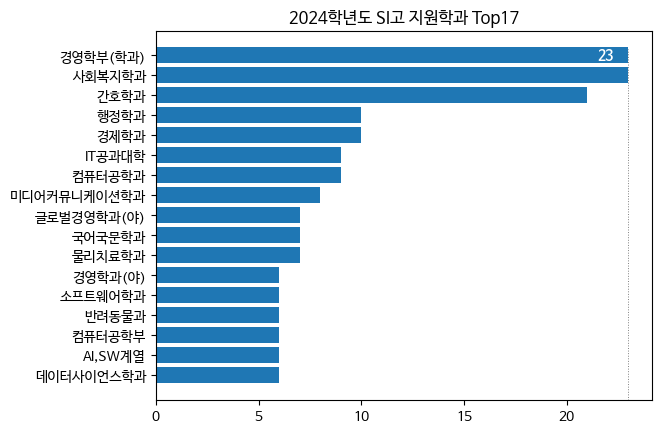

In [ ]:
#12. 지원학과 막대그래프(가로)

import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})


# Filter the rows based on the frequency of the "대학" column
freq = df['모집단위'].value_counts()
freq = freq[freq >= 6]

# 대학수
freq_num = len(freq)

# Create a horizontal bar plot with descending order
freq_sorted = freq.sort_values()
plt.barh(freq_sorted.index, freq_sorted)



# Draw a dotted vertical line only from the X-axis tick with maximum value of the plot
max_value = max(freq_sorted)
plt.axvline(max_value, linestyle=':', color='gray', linewidth=0.7, ymax=0.95)  # 아래쪽 x축까지 선이 도달하도록 ymax 설정



# Annotate the maximum value on the plot
plt.text(max_value - 1.5, len(freq_sorted) - 1, f'{max_value}', color='white', fontsize=10, va='center', fontweight='bold')



# Save the plot in png and pdf formats
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'

plt.title(f"2024학년도 SI고 지원학과 Top{freq_num}")
plt.savefig(f'{path1}2024haggwa_preferred.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{path2}2024haggwa_preferred.pdf', bbox_inches='tight')
plt.show()

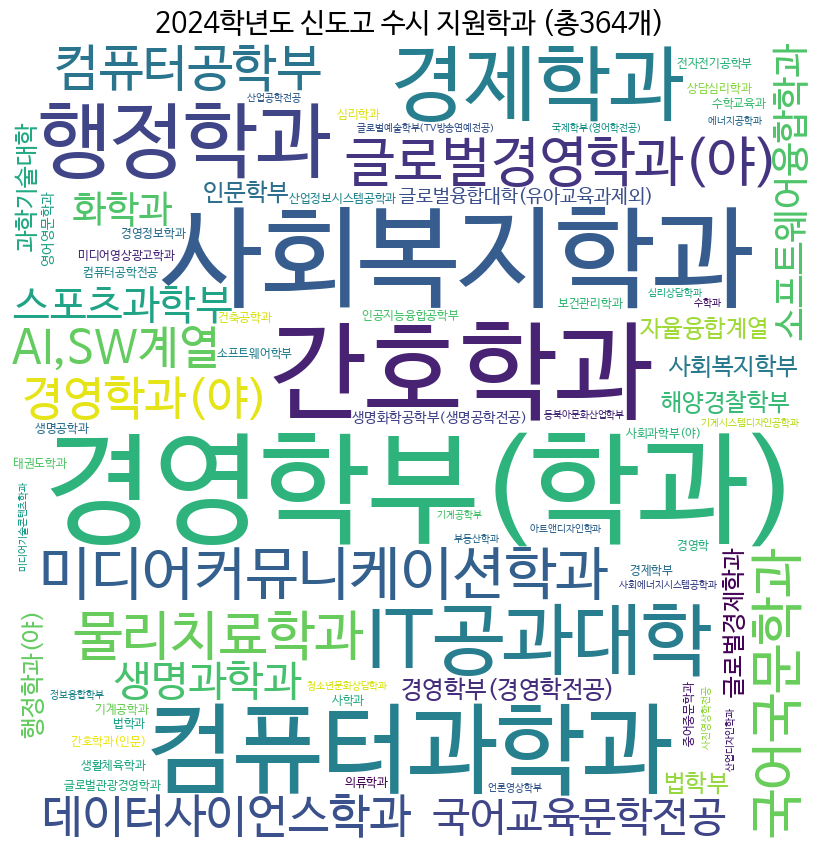

In [ ]:
#13.선호학과 워드클라우드(wordcloud)

import random
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime

# Get the current year
current_year = datetime.datetime.now().year


# Assuming the academic year starts this year and continues into the next year
academic_year = f"{current_year}학년도"


# '모집단위' 열에서 '경영학과'와 '경영학부'를 '경영학부(학과)'로 합산
df['모집단위'] = df['모집단위'].replace({'경영학과': '경영학부(학과)', '경영학부': '경영학부(학과)'})



# '모집단위' 열에서 '컴퓨터관련학과' 합산
df['모집단위'] = df['모집단위'].replace({'컴퓨터소프트웨어학과': '컴퓨터과학과', '소프트웨어학과': '컴퓨터과학과',  '컴퓨터공학과': '컴퓨터과학과'})



# '모집단위' 열에서 '국어교육문학' 합산
df['모집단위'] = df['모집단위'].replace({'국어국문문예창작학부': '국어교육문학전공', '국어교육과': '국어교육문학전공'})



#지원시기: 수시
df_apply = df[df.지원시기  == '수시']


#중복제외한 대학수
df_dup = df_apply.drop_duplicates('모집단위')
df_freq = len(df_dup['모집단위'])



#결과를 하나로 고정
random.seed(42)  # set the random seed



wordcloud = WordCloud(font_path='NanumBarunGothic', width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(df_apply['모집단위'].value_counts())


fig = plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


# Now update the title string to include the current academic year
plt.title(f"{academic_year} 신도고 수시 지원학과 (총{df_freq}개)", fontsize=20)

path = '/content/drive/MyDrive/python/sindo/result_wordcloud/'
pdf_path = f'{path}2024학년도_신도고_wordcloud.pdf'
plt.savefig(pdf_path, dpi=300, bbox_inches='tight', pad_inches=0)

wordcloud.to_file(f'{path}2024학년도_신도고_지원학과wordcloud.png')

plt.show()

In [ ]:
#14. 반별 4년제 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


#4년제 지원자수(중복포함)
seoul_df_fouryearapply = df[~(df.대학.str.contains("대학교"))]
seoul_df_fouryearapply = len(seoul_df_fouryearapply)

#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]


#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)


#4년제 합격률 = 4년제 합격건수 / 4년제 지원자수
seoul_df_fouryearpass = (seoul_df_freq / seoul_df_fouryearapply) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)

#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')


# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")



#합격자수
print("2024학년도  SI고 4년제 대학 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print("2024학년도  SI고 4년제 대학 합격자수는 %d명입니다.(중복제외)" % len(seoul_df_person))


print(f"2024학년도  SI고 4년제 대학 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")


#데이터 프레임으로 전환
seoul_df_p = pd.DataFrame(seoul_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
seoul_df_p.to_excel(excel_writer= f'{path}반별4년제합격자_2024_신도고.xlsx')

In [ ]:
#15. 4년제 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')



#4년제 지원자수(중복포함)
#seoul_df_fouryearapply = df[~(df.대학.str.contains("대학교"))]
#seoul_df_fouryearapply = len(seoul_df_fouryearapply)

#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]


#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)



#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')
seoul_df_person = len(seoul_df_person)



#졸업생대비 4년제 합격률 = 4년제 합격자 / 졸업생수(147)
numofgraduate = 147
seoul_df_fouryearpass = (seoul_df_person / numofgraduate) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)



#합격자수
print("2024학년도  SI고 4년제 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print(f"2024학년도  SI고 4년제 합격자수는 {seoul_df_person}명입니다.(중복제외)")


print(f"2024학년도  SI고 4년제 졸업생 대비 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")

# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")



In [ ]:
#16. 수도권(서울, 경기, 인천) 4년제 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

area = ['서울', '경기', '인천']

#4년제 지원자수(중복포함)
seoul_df_fouryearapply = df[~(df.대학.str.contains("대학교"))]
seoul_df_fouryearapply = len(seoul_df_fouryearapply)

#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교")) & ~(df.대학.str.contains("전문대"))]

seoul_df = seoul_df[seoul_df['지역'].isin(area)]


#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)



#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')
seoul_df_person = len(seoul_df_person)



#졸업생대비 4년제 합격률 = 4년제 합격자 / 졸업생수(147)
numofgraduate = 147
seoul_df_fouryearpass = (seoul_df_person / numofgraduate) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)



#합격자수
print("2024학년도  SI고 4년제 수도권대 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print(f"2024학년도  SI고 4년제 수도권대 합격자수는 {seoul_df_person}명입니다.(중복제외)")


print(f"2024학년도  SI고 4년제 수도권대 졸업생 대비 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")

# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")


#데이터 프레임으로 전환
seoul_df_p = pd.DataFrame(seoul_df)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
seoul_df_p.to_excel(excel_writer= f'{path}수도권합격자명단_2024_신도고.xlsx')

In [ ]:
#17. 전문대 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

area = ['서울', '경기', '인천']


#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & (df.대학.str.contains("대학교"))]


#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)



#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')
seoul_df_person = len(seoul_df_person)



#졸업생대비 4년제 합격률 = 4년제 합격자 / 졸업생수(147)
numofgraduate = 147
seoul_df_fouryearpass = (seoul_df_person / numofgraduate) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)



#합격자수
print("2024학년도  SI고 전문대 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print(f"2024학년도  SI고 전문대 합격자수는 {seoul_df_person}명입니다.(중복제외)")


print(f"2024학년도  SI고 전문대 졸업생 대비 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")

# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

In [ ]:
#18. 인서울 4년제 합격자 명단


#15. 4년제 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

area = ['서울']


#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교")) & ~(df.대학.str.contains("전문대"))]


#인서울로 제한
seoul_df = seoul_df[seoul_df['지역'].isin(area)]



#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)



#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')
seoul_df_person = len(seoul_df_person)



#졸업생대비 4년제 합격률 = 4년제 합격자 / 졸업생수(147)
numofgraduate = 147
seoul_df_fouryearpass = (seoul_df_person / numofgraduate) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)



#합격자수
print("2024학년도  SI고 인서울 4년제 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print(f"2024학년도  SI고 인서울 4년제 합격자수는 {seoul_df_person}명입니다.(중복제외)")


print(f"2024학년도  SI고 인서울 4년제 졸업생 대비 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")

# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")



In [ ]:
#16. 지방 4년제 합격자 명단

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

area = ['서울', '경기', '인천']

#4년제 지원자수(중복포함)
seoul_df_fouryearapply = df[~(df.대학.str.contains("대학교"))]
seoul_df_fouryearapply = len(seoul_df_fouryearapply)

#지역, 최종, ace대학 제외
seoul_df = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교")) & ~(df.대학.str.contains("전문대"))]

seoul_df = seoul_df[~seoul_df['지역'].isin(area)]


#4년제 합격건수(중복포함)
seoul_df_freq = len(seoul_df)



#필요한 변수(열)만 불러옴
seoul_df = seoul_df[['지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



#중복제외한 합격자수
seoul_df_person = seoul_df.drop_duplicates('이름')
seoul_df_person = len(seoul_df_person)



#졸업생대비 4년제 합격률 = 4년제 합격자 / 졸업생수(147)
numofgraduate = 147
seoul_df_fouryearpass = (seoul_df_person / numofgraduate) *100
seoul_df_fouryearpass = int(seoul_df_fouryearpass)



#합격자수
print("2024학년도  SI고 4년제 지방 합격건수는 %d건입니다.(중복합격 포함)" % len(seoul_df))

print(f"2024학년도  SI고 4년제  지방 합격자수는 {seoul_df_person}명입니다.(중복제외)")


print(f"2024학년도  SI고 4년제 지방 졸업생 대비 합격률은 {seoul_df_fouryearpass}%입니다.(중복포함)")

# tabulate를 사용하여 결과 출력
print(tabulate(seoul_df, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")


#데이터 프레임으로 전환
seoul_df_p = pd.DataFrame(seoul_df)



In [ ]:
df.groupby('지역').size()

,0
지역,
강원,21
경기,321
경북,3
광주,1
대구,5
대전,11
부산,3
서울,424
세종,7


In [ ]:
#16. 4년제 합격자 명단A: 선호대학 순

import pandas as pd
from tabulate import tabulate



# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '이름', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류', '표점합_수능', '백분위_수능']]


uni4['전과목'] = uni4['전과목'].round(2)

# NaN 값을 '졸업생'으로 변경
uni4['전과목'].fillna('졸업생', inplace=True)


#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()


# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '동덕여대', '가천대(글로벌)', '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 신도고 대학 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}선호대학순_2024_신도고_uniorder.xlsx')

In [ ]:
#17. 4년제대 합격자 명단A: 선호대학 순 - 게시용 익명


from tabulate import tabulate

# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]

# 필요한 변수(열)만 불러옴
uni4 = uni4[['이름', '지역', '대학', '모집단위', '최종', '전과목', '전형분류', '전형명', '전형방법']]

uni4['전과목'] = uni4['전과목'].round(2)


# Show first one letter and replace the rest of the letters with an asterisk in '이름' column
uni4['이름'] = uni4['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

# 대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()

# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)', '동덕여대', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']



#uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))
uni4 = uni4.sort_values(by=['대학'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 합격자수
print("2024학년도 신도고 대학 합격자수는 %d건입니다.(중복포함)" % len(uni4))

# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}합격자익명_2024_신도고_uniorder_anonymous.xlsx')


## 첫글자는 남기고 나머지 글자는 별표표시

uni4['이름'] = uni4['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

이 코드는 데이터프레임의 '이름' 열에 있는 각각의 값을 수정하는데 사용됩니다. 여기서는 lambda 함수를 사용하여 각 이름을 변경하고 있습니다.

설명을 간단히 하면:

1. uni4['이름'].apply()는 '이름' 열의 각 항목에 함수를 적용하는 메서드입니다.

2. lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x 부분은 람다 함수입니다. 이 함수는 이름의 길이가 2 이상인 경우에만 실행됩니다.

3. x[:1]은 이름의 첫 번째 글자를 가져옵니다.

4. ' * ' * (len(x) - 1)은 첫 번째 글자를 제외한 나머지 글자를 '*'로 바꿉니다. 글자의 길이에서 1을 빼는 이유는 첫 번째 글자는 그대로 두기 위해서입니다.

5. if len(x) >= 2 else x는 이름이 두 글자 이상일 때만 위의 작업을 수행하고, 그렇지 않으면 이름을 그대로 반환합니다.

In [ ]:
#17-1. 게시용 4년제대 합격자 명단B: '지역', '대학', '모집단위', '지원시기'


import pandas as pd
from tabulate import tabulate

# 최종 열의 값이 '가나다'일 때 '정시'로 변경
df.loc[df['최종'] == '가나다', '최종'] = '정시'

# 게시용 4년제대 합격자 명단A: '지역', '대학', '모집단위', '지원시기'

# uni4 DataFrame 생성
uni4 = df[(df['최종'] == '합') & ~(df['대학'].str.contains("대학교"))][['지역', '대학', '모집단위', '지원시기']]


# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()


# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']



uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))

# 합격자수
print("2024 SI고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("***************************************************************************")

# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))

# 데이터프레임을 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
uni4.to_excel(excel_writer=f'{path}게시용합격자_2024_신도고_uniorder_board1.xlsx', index=False)


In [ ]:
#17-2. 게시용 4년제대 합격자 명단C: '지역', '대학', '모집단위', '지원시기', '전형분류'

from tabulate import tabulate


# 지역, 최종, ace대학 제외
uni4 = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))]



# '지원시기' 열의 값이 '가', '나', '다'일 경우 '정시'로 변경
uni4.loc[uni4['지원시기'].isin(['가', '나', '다']), '지원시기'] = '정시'


# 필요한 변수(열)만 불러옴
uni4 = uni4[['지역', '대학', '모집단위', '지원시기', '전형분류']]



#대구카톨릭대 국어교육과 합격자 제외
uni4 = uni4[~((uni4['대학'] == '대구가톨릭대') & (uni4['모집단위'] == '국어교육과'))].copy()



# 결과를 출력할 순서대로 정렬
output_order = ['대구가톨릭대', '서울대',  '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '숙명여대',
                '국민대', '숭실대', '세종대', '서울과기대', '광운대', '명지대', '상명대', '가톨릭대(성심)', '가천대(글로벌)',
                '한국예술종합학교', '공군사관학교', '한성대', '서경대', '삼육대',  '성신여대', '서울여대', '덕성여대', '아주대', '인하대', '한양대(에리카)']


uni4 = uni4.sort_values(by=['대학', '모집단위'], key=lambda x: x.map({v: i for i, v in enumerate(output_order)}))



# 합격자수
print("2024 SI고 4년제대 합격자수는 %d건입니다.(중복합격 포함)" % len(uni4))
print("**********************************************************************")


# tabulate를 사용하여 결과 출력
print(tabulate(uni4, headers='keys', tablefmt='plain', showindex=False))


# 데이터 프레임으로 전환
uni4_p = pd.DataFrame(uni4)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
uni4_p.to_excel(excel_writer=f'{path}pass_2024_신도고_uniorder_board2.xlsx')

In [52]:
#18. 지원횟수가 궁금한 대학

import pandas as pd

## 데이터 불러오기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

uni = input("지원횟수가 궁금한 대학: ")

# 대학명에 입력한 문자열이 포함된 행들을 찾기
df_uni = df[df['대학'].str.contains(uni, regex=False)]
df_uni = df_uni[['이름', '대학', '모집단위', '최종', '전과목', '등급_수능', '백분위_수능', '전형분류']]


#전과목 열의 값을 소수점 둘째 자리에서 반올림하기
df_uni['전과목'] = df_uni['전과목'].round(1)
#df_uni['백분위_수능'] = df_uni['백분위_수능'].round(1)
df_uni['백분위_수능'] = df_uni['백분위_수능'].astype(int)

#전과목 순으로 오름차순
df_uni = df_uni.sort_values(by='전과목')d

#지원건수 세기
df_uni_len = len(df_uni)


# Convert DataFrame to a list of lists for tabulate
table_data = df_uni.values.tolist()


# Define the table headers
table_headers = ['이름', '대학', '모집단위', '최종', '전과목', '등급_수능', '백분위_수능','전형분류']


# Create the formatted table using tabulate
table_string = tabulate(table_data, headers=table_headers, tablefmt='plain')


print(f'{uni}에 지원한 횟수는 {df_uni_len}회')
print('----------------------------------------')
print(f'{uni} 지원명단')
print(table_string)
#print(df_uni)

지원횟수가 궁금한 대학: 연세대
연세대에 지원한 횟수는 12회
----------------------------------------
연세대 지원명단
  이름  대학          모집단위              최종      전과목    등급_수능    백분위_수능  전형분류
   nan  연세대        화학과                불           1.5        2.25              81  교과
   nan  연세대        간호학과              불           1.6        2.75              78  교과
   nan  연세대        시스템생물학과        불           1.6        2.625             83  교과
   nan  연세대        사회환경시스템공학부  불           1.7        2.625             81  교과
   nan  연세대        노어노문학과          합           2.3        3.875             59  교과
   nan  연세대(미래)  물리치료학과          불           2.7        4.125             53  종합
   nan  연세대(미래)  소프트웨어학부        불           3.6        4.875             47  교과
   nan  연세대(미래)  자율융합계열          불           3.9        5                 40  교과
   nan  연세대(미래)  자율융합계열          합           4.3        7.125             16  종합
   nan  연세대(미래)  자율융합계열          불           4.8        6.375             21  종합
   nan  연세대(미래)  물리치료학과

In [ ]:
#19. 특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 인원)

mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위_수능 >= mi) & (df.백분위_수능 < mx)]

#중복학생을 제외하고 1개만 남김
df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '전과목', '등급_수능', '백분위_수능']].copy()


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['백분위_수능'] = df_interval_name['백분위_수능'].round(1)


#전과목 열을 소숫점 둘째자리까지만 표시
df_interval_name['전과목'] = df_interval_name['전과목'].round(2)


#결과를 백분위_수능순으로 내림차순
df_interval_name = df_interval_name.sort_values(by='백분위_수능', ascending=False)


# Define the table headers
table_headers = ['학번', '이름', '전과목', '등급_수능', '백분위_수능']


# Create the formatted table using tabulate
table_string = tabulate(df_interval_name, headers=table_headers, tablefmt='plain')
print(table_string)
print()


print("--------------------------------------------")
#print(str(len(list_1))+"명")

print(f"백분위 {mi}%이상 {mx}% 미만 :{len(df_interval)}명")
#자료 https://stackoverflow.com/questions/43855474/changing-sort-in-value-counts8

In [ ]:
#20. 수시 1인당 지원건수: 중복제거


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


df_susi = df[df['지원시기'] == '수시']
df_drop = df_susi.drop_duplicates('이름')
df_drop = len(df_drop)
df_apply = len(df_susi)

df_cal = round(df_apply / df_drop, 1)

print(f'수시 지원건수: {df_apply}회')
print(f'수시 지원자  {df_drop}명')

print(f'2024학년도 수시 1인당 평균 지원건수는 {df_cal}회')

수시 지원건수: 559회
수시 지원자  108명
2024학년도 수시 평균 지원건수는 5.2회


In [ ]:
#21. 영어 등급별 인원

mi = int(input("영어 수능등급:"))
df_interval = df[(df.영어_등급 == mi)]
df_interval[['학번', '영어_등급']]

df_interval_unique = df_interval['학번'].unique().size
print("영어 수능등급 {}명".format(df_interval_unique))

영어 수능등급:1
영어 수능등급 6명


In [ ]:
#22. 학교 수능 백분위평균

# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


df_standard = df_filtered.dropna(subset = ['백분위_수능'])


s_mean = df_standard['백분위_수능'].mean().round(0)
print(f"2024학년도 SI고 수능 백분위점수는 {int(s_mean)}%입니다.")  # 소수점 첫째 자리에서 반올림

2024학년도 SI고 수능 백분위점수는 41%입니다.


In [ ]:
#23. 학교 수능 등급평균


# '학번' 열에서 '380'이 들어있지 않은 행 추출: 재수생들 제외
df_filtered = df[~df['학번'].astype(str).str.contains('380')]


df_standard = df_filtered.dropna(subset = ['등급_수능'])


s_mean = df_standard['등급_수능'].mean().round(1)
print(f"2024학년도 SI고 수능 등급은 {(s_mean)}입니다.")

2024학년도 SI고 수능 등급은 5.2입니다.


In [ ]:
#24. 학교 수능 표점합 평균: '국어_표준점수', '수학_표준점수', '선택1_표준점수', '선택2_표준점수'의 열의 값이 모두 1이상인 행의 값을 합산

total_standard_scores = df_filtered[(df_filtered['국어_표준점수'] >= 1) &
                                    (df_filtered['수학_표준점수'] >= 1) &
                                    (df_filtered['선택1_표준점수'] >= 1) &
                                    (df_filtered['선택2_표준점수'] >= 1)].sum(numeric_only=True)

# '표점합_수능' 열의 유효값들의 합산을 해당 빈도로 나누어 평균계산
valid_scores_count = df_standard['표점합_수능'].count()
total_valid_scores = df_standard['표점합_수능'].sum()
average_score = total_valid_scores / valid_scores_count

# 결과 출력
print(f"2024학년도 SI고 수능 표점합점수는 {average_score:.0f}점입니다.")

2024학년도 SI고 수능 표점합점수는 281점입니다.


In [ ]:
#25. 특정 수능 백분위점수 구간의 내신과 수능백분위의 상관관계

import pandas as pd
import numpy as np
from scipy.stats import pearsonr


#특정 백분위 구간의 점수별 빈도(ex: 80~85%사이의 빈도수)
mi = int(input("이상:"))
mx = int(input("미만:"))


# mx이상 mi이하 조건을 충족하는 객체 만들기
df_interval = df[(df.백분위_수능 >= mi) & (df.백분위_수능 < mx)]

#중복학생을 제외하고 1개만 남김
#df_interval = df_interval.drop_duplicates('이름')

df_interval_name = df_interval[['학번', '이름', '백분위_수능', '전과목']].copy()


# 상관계수 및 p-값 계산
corr, p_value = pearsonr(df_interval_name['전과목'], df_interval_name['백분위_수능'])
r_squared = corr ** 2

# 결과 출력
print(f"내신과 수능백분위의 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.2f}")
print(f"설명력: {r_squared:.2f}")

이상:77
미만:99
상관계수: -0.88
p-값: 0.00
설명력: 0.77


In [ ]:
#26. 중복뺀 수시지원 인원
df_susi = df[df['지원시기'] == '수시']
df_drop = df_susi.drop_duplicates('이름')
df_drop = len(df_drop)

print(df_drop)

108


In [ ]:
#27. 중복포함한 전체 합격건수: 중복 합격포함 : 134건


df_pass = df[df.최종 == '합']
print(df_pass.count())

#수시, 정시별 합격건수: 수시(123건), 정시(11건)
#df_pass.groupby(['지원시기']).count()

In [ ]:
#28. 중복제외한 전체 합격자수

df_pass['학번'].unique()

#중복합격자수 제외한 합격자수: 71명
df_pass['학번'].nunique()

In [ ]:
#29. 반 입력해서 해당반 학생들 출력하기 ex)302
num = input("학년반 ex)301: ")
df_num = df[df['학번'].astype(str).str.contains(num)]
df_num = df_num[['학번', '이름', '대학', '모집단위', '전과목', '백분위_수능']]
df_num

# 이름을 입력하여 내신기준 석차를 출력하는 코드 설명

1)* df[df['전과목'] < df_filtered['전과목'].iloc[0]]* selects rows from the DataFrame where the "전과목" value is lower than the "전과목" value of the student whose name was input by the user. This creates a filtered DataFrame that includes all students who have a lower "전과목" value than the input student.


2) *.groupby('이름')['전과목']* groups the filtered DataFrame by the "이름" column and selects the "전과목" column. This creates a Series object that contains the "전과목" values of all the students who have a higher "전과목" value than the input student, grouped by name.


3) *.nunique()* counts the number of unique "전과목" values in the grouped Series. This effectively counts the number of students who have a higher "전과목" value than the input student, excluding any duplicates.

4) *.sum()* adds up the counts of unique "전과목" values for all the groups. This gives the total number of students who have a higher "전과목" value than the input student, excluding duplicates.

5)* + 1* adds 1 to the total count to get the rank of the input student, since the rank is equal to the number of students with a higher "전과목" value plus 1.

6) Finally, the rank is assigned to the rank variable and returned as the output of the program.

수능의 이론적 평균
1. 백분위 : 50%
2. 표준점수: 300점 - 국어(100) + 수학(100) + 탐구1(50) + 탐구2(50)
3. 수능등급: 5등급 - 9등급 중 중간값(median)

In [ ]:
#30. 수능이 내신보다 더 잘 나온 학생수와 비율

# Filter the DataFrame
filtered_df = df[df['전과목'] > df['등급_수능']]
filtered_df = filtered_df.drop_duplicates(subset='이름')


# Round the '전과목' column to two decimal places
filtered_df['전과목'] = filtered_df['전과목'].apply(lambda x: round(x, 1))

filtered_df_total = df.drop_duplicates(subset='이름')
filtered_df_num = len(filtered_df_total)
filtered_df_num_div = (len(filtered_df) / filtered_df_num)*100
filtered_df_num_div = round(filtered_df_num_div, 0)


# Print the filtered DataFrame
print(filtered_df[['이름', '전과목', ]])
print("-----------------------------------------------------")
print(f'SI고 2024학년도 고3의 수능이 내신보다 높게 나온 학생 {len(filtered_df)}명이고 비율은 {int(filtered_df_num_div)}%입니다.')

      이름  전과목
493  이미르  5.7
602  이태규  4.9
706  정성욱  7.6
-----------------------------------------------------
E고 2024학년도 고3의 수능이 내신보다 높게 나온 학생 3명이고 비율은 3%입니다.


In [ ]:
#32. 영어 1등급 비율계산A: 중복고려하지 않고 전체 1등급학생수를 영어등급학생수로 나눈 비율

df_english1_ratio = (df['영어_등급'] == 1.0).sum() / len(df['영어_등급'])*100
df_english1_ratio_int = int(df_english1_ratio.round(0))
print(f'영어1등급 {df_english1_ratio_int}%')

영어1등급 1%


In [ ]:
#32-1. 영어 1등급 비율계산법B: 중복제외한 응시자수
df_name_uniq = df.drop_duplicates('이름')
df_name_uniq_count = len(df_name_uniq)


#중복 제외한 영어1등급 학생수
df_name_uniq_eng = df_name_uniq[df_name_uniq['영어_등급'] == 1.0 ]
df_name_uniq_eng = len(df_name_uniq_eng)

df_eng_pct = (df_name_uniq_eng / df_name_uniq_count) * 100
df_eng_pct = int(round(df_eng_pct, 0))



print(f'영어 1등급 비율은 {df_eng_pct}%입니다.')

영어 1등급 비율은 1%입니다.


In [ ]:
#33. 수시 영어1등급 학생명단 및 학생수

#라이브러리 불러오기
from tabulate import tabulate

#수시
df_susi = df[df['지원시기'] == '수시']

#1등급 filter
df_susi_english1 = df_susi[df_susi['영어_등급'] == 1.0]


#이름 중복자 제외
df_susi_english1 = df_susi_english1.drop_duplicates('이름')


#백분위_수능를 소수점 첫째자리까지 표시
df_susi_english1['백분위_수능'] = df_susi_english1['백분위_수능'].round(1)


#필요한 열
df_susi_english1 = df_susi_english1[['이름', '영어_등급', '전과목', '백분위_수능']]


# Define the table headers
table_headers = ['학번', '이름', '영어_등급', '전과목', '백분위_수능']

#영어1등급 받은 학생수
df_susi_english1_num = len(df_susi_english1)

# Create the formatted table using tabulate
table_string = tabulate(df_susi_english1, headers=table_headers, tablefmt='plain')


#출력
print(f'영어1등급 학생은 {df_susi_english1_num}명입니다.')
print()
print(table_string)

영어1등급 학생은 1명입니다.

  학번  이름      영어_등급    전과목    백분위수능
    30  김유리            1     1.125          89.2


In [ ]:
#34. 특정학과별(모집단위) 지원횟수, 합격횟수, 불합격횟수, 합격률

import pandas as pd
from tabulate import tabulate


# 모집단위 입력 받기
uni = input("모집단위: ")

# 모집단위와 '최종' 열이 '합' 또는 '불'인 행 필터링
mask = df['모집단위'].notna() & df['모집단위'].str.contains(uni, na=False)
df_filtered = df[mask].copy()

# '합'과 '불' 빈도 계산
count_total = len(df_filtered)
count_pass = len(df_filtered[df_filtered['최종'].str.contains('합', na=False)])
count_fail = len(df_filtered[df_filtered['최종'].str.contains('불', na=False)]) + len(df_filtered[df_filtered['최종'].isna()])

# '합'의 백분율 계산
percentage_pass = (count_pass / count_total) * 100 if count_total > 0 else 0


#df_filtered['전과목'] = df_filtered['전과목'].round(2)
df_filtered.loc[:, '전과목'] = df_filtered['전과목'].round(2)


# 필요한 컬럼 선택
columns_required = ['학번', '지역', '대학', '모집단위', '최종', '전과목', '전형명', '전형분류', '전형방법']
df_subset = df_filtered[columns_required]

# 테이블 형태로 출력
table_string = tabulate(df_subset, headers=columns_required, tablefmt='plain', showindex=False)

print()
print(f"{uni}에 지원한 학생 명단")
print("**********************************************************************************************************************************************")
print(table_string)
print()
print(f"{uni} 모집단위 지원횟수: {count_total}건")
print("**********************************************************************************************************************************************")
print(f"{uni} 모집단위 합격횟수: {count_pass}건, 불합격 횟수: {count_fail}건")
print()
print(f"{uni} 모집단위의 합격률: {percentage_pass:.1f}%")

모집단위: 태권도

태권도에 지원한 학생 명단
**********************************************************************************************************************************************
  학번  지역    대학            모집단위                  최종      전과목  전형명              전형분류    전형방법
 30110  서울    한국체육대      태권도학과                불          7.82  실기우수자          실기        학생부30%+실기70%
 30110  서울    한국체육대      태권도학과(공인품새)      불          7.82  경기입상실적우수자  실기        1단계:[5배수]학생부35%+입상실적65%
                                                                                                            2단계:1단계성적60%+실기40%
 30110  경기    가천대(글로벌)  태권도전공                불          7.82  실기우수자          실기        학생부30%+실기70%
 30110  경기    용인대          태권도학과(품새)          불          7.82  체육우수자 특별     실기        학생부20%+실기40%+입상실적40%
 30114  경기    신한대          태권도학부(시범문화전공)  불          6.17  실기우수자          실기        학생부20%+실기80%
 30114  경기    용인대          태권도학과                불          6.17  일반학생            실기        학생부40%+실기60%


In [ ]:
#35. 계열합격률: 공통, 예체능을 인문으로 통합

from tabulate import tabulate

# 지역, 최종, ace대학 제외
df_4year = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))].copy()

# Combine '공통' and '예체능' into '인문' 계열
df_4year['계열'] = df_4year['계열'].replace(['공통', '예체능'], '인문')

# Group by '계열' and calculate the ratio
result = df_4year.groupby('계열').size().reset_index(name='합격자(건)')
result['비율(%)'] = (result['합격자(건)'] / result['합격자(건)'].sum() * 100).round(0).astype(int)  # Round to the nearest integer

# Rename the columns
result = result.rename(columns={'계열': '계열', '합격자(건)': '합격자(건)', '비율(%)': '비율(%)'})

print(tabulate(result, headers='keys', tablefmt='plain', showindex=False))

계열      합격자(건)    비율(%)
인문              90         54
자연              76         46


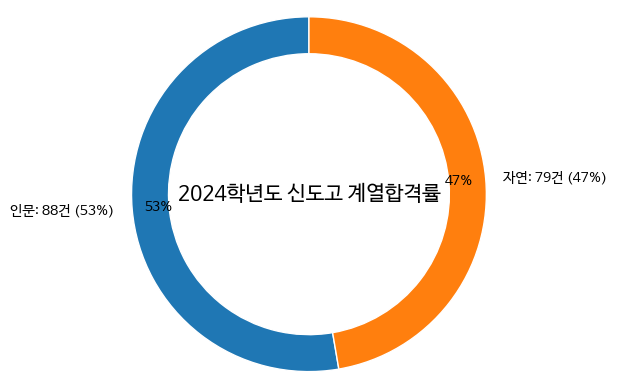

In [2]:
#36. 계열 합격률 도넛차트- 공통, 예체능을 인문으로 통합


import matplotlib.pyplot as plt
from tabulate import tabulate

# 지역, 최종, ace대학 제외
df_4year = df[(df.최종 == '합') & ~(df.대학.str.contains("대학교"))].copy()

# Combine '공통' and '예체능' into '인문' 계열
df_4year['계열'] = df_4year['계열'].replace(['공통', '예체능'], '인문')

# Group by '계열' and calculate the ratio
result = df_4year.groupby('계열').size().reset_index(name='합격자(건)')
result['비율(%)'] = (result['합격자(건)'] / result['합격자(건)'].sum() * 100).round(0).astype(int)  # Round to the nearest integer

# Rename the columns
result = result.rename(columns={'계열': '계열', '합격자(건)': '합격자(건)', '비율(%)': '비율(%)'})



# 시각화 부분 수정
fig, ax = plt.subplots()
ax.pie(result['합격자(건)'], labels=result['계열'] + ': ' + result['합격자(건)'].astype(str) + '건 (' + result['비율(%)'].astype(str) + '%)', startangle=90, radius=1.2, autopct='%1.0f%%', pctdistance=0.85, wedgeprops=dict(width=0.25, edgecolor='w'))

# 제목 추가
plt.text(0, 0, '2024학년도 신도고 계열합격률', fontsize=15, ha='center', va='center')


#저장
path1 = '/content/drive/MyDrive/python/sindo/result_png/'
path2 = '/content/drive/MyDrive/python/sindo/result_pdf/'


plt.savefig(f'{path}pass_2024_신도고_합격률_인문자연비교.png')
plt.savefig(f'{path}pass_2024_신도고_합격률_인문자연비교.pdf')



plt.show()

In [ ]:
# '계열' 별로 합격한 학생 수 계산
pass_counts_by_dept = df[df['최종'] == '합'].groupby('계열').size()

# '계열' 별로 총 학생 수 계산
total_counts_by_dept = df.groupby('계열').size()

# '계열' 별 합격률 계산
pass_rates_by_dept = pass_counts_by_dept / total_counts_by_dept * 100

# 결과 출력
print(pass_rates_by_dept)

In [ ]:
df.groupby(by = '계열').size()

#df.groupby('계열').count() : 결과가 전체열의 빈도가 나옴

계열
공통       2
예체능    134
인문     289
자연     347
dtype: int64

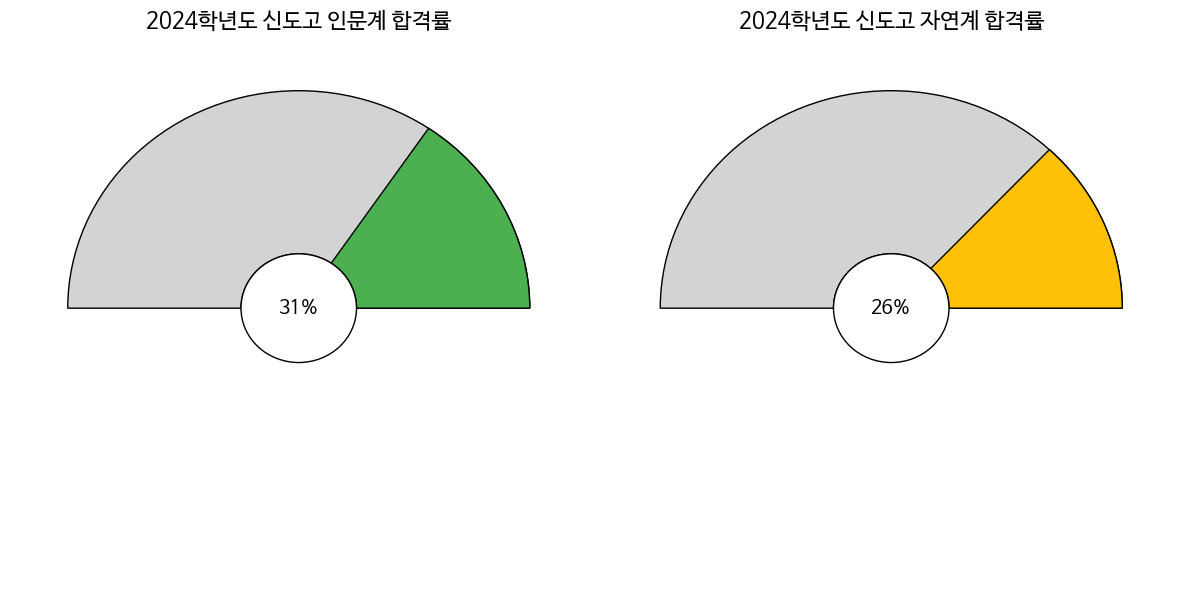

In [4]:
#37. 계열별 합격률 반원 그래프 - 인문 합격률, 자연합격률

import matplotlib.pyplot as plt

from matplotlib.patches import Patch, Path, Wedge, Circle  # Circle 추가
import matplotlib.patches as patches


# '인문' 계열에서 '최종'이 '합'인 비율 계산
인문_합격자수 = df[(df['계열'] == '인문') & (df['최종'] == '합')].shape[0]
인문_전체 = df[df['계열'] == '인문'].shape[0]

ratio_inmun = (인문_합격자수 / 인문_전체) * 100 if 인문_전체 > 0 else 0
ratio_inmun = round(ratio_inmun)


# '자연' 계열에서 '최종'이 '합'인 비율 계산
자연_합격자수 = df[(df['계열'] == '자연') & (df['최종'] == '합')].shape[0]
자연_전체 = df[df['계열'] == '자연'].shape[0]

ratio_jayun = (자연_합격자수 / 자연_전체) * 100 if 자연_전체 > 0 else 0
ratio_jayun = round(ratio_jayun)


def draw_gauge_chart(ax, percentage, title, color):
    # 배경 원 그리기
    ax.add_patch(patches.Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=180, width=0.3, facecolor='lightgrey', edgecolor='black'))

    # 비율에 따른 원 그리기
    if percentage > 0:
        ax.add_patch(patches.Wedge(center=(0.5, 0.5), r=0.4, theta1=0, theta2=180 * percentage / 100, width=0.3, facecolor=color, edgecolor='black'))

    # 가운데 원(도넛 형태 만들기)
    ax.add_patch(Circle((0.5, 0.5), 0.1, transform=ax.transAxes, facecolor='white', edgecolor='black'))

    # 텍스트 및 타이틀 추가
    ax.text(0.5, 0.5, f'{percentage}%', horizontalalignment='center', verticalalignment='center', fontsize=14, transform=ax.transAxes)
    ax.set_title(title, fontsize=16)

    # 축 및 눈금 제거
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')


# 각 계열의 비율
ratios = {'인문': ratio_inmun, '자연': ratio_jayun}
colors = {'인문': '#4CAF50', '자연': '#FFC107'}

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax, (title, percentage) in zip(axs, ratios.items()):
    draw_gauge_chart(ax, percentage, f'2024학년도 신도고 {title}계 합격률', colors[title])

plt.tight_layout()

#저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'

#plt.savefig(f'{path}pass_2024_신도고_합격률_계열별합격률.png')
#plt.savefig(f'{path}pass_2024_신도고_합격률_계열별합격률.pdf')

plt.show()

In [ ]:
#38. 특정등급대별 학생명단

min = float(input('몇등급이상:'))
max = float(input('몇등급이상:'))

df_one = df[(df['전과목'] >= min) & (df['전과목'] < max)]
df_one = df_one.drop_duplicates('이름')
df_one = df_one[['이름', '전과목']].sort_values(by = '전과목')
df_one

몇등급이상:1
몇등급이상:2


,이름,전과목
30,김유리,1.125
608,정태인,1.646
78,윤벼리,1.683
96,조하민,1.760
647,염상민,1.779


몇 등급 이상: 3
몇 등급 미만: 4


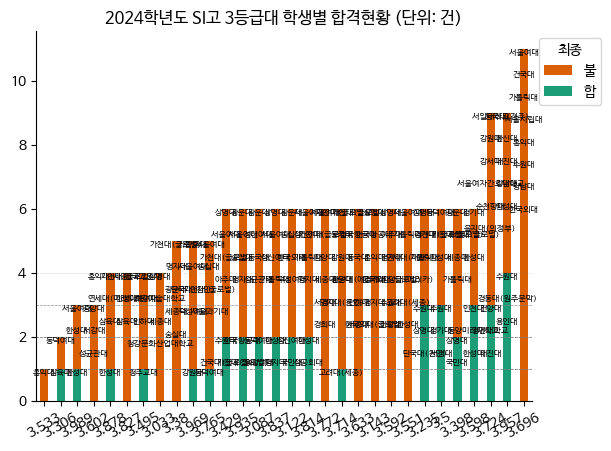

In [74]:
# 39-1. 등급 입력하면 등급대 합격자 나오는 그래프: 합격자 대학만 표시

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

## 데이터 불러오기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


# 사용자 입력 받기
lownum = float(input("몇 등급 이상: "))
highnum = float(input("몇 등급 미만: "))

# 필터링 조건에 맞는 데이터 추출
df_one = df[(df['전과목'] >= lownum) & (df['전과목'] < highnum)].copy()

# '최종', '대학' 데이터를 각 '최종' 상태에 따라 집계
pivot_data = df_one.pivot_table(index='전과목', columns='최종', values='학번', aggfunc='count', fill_value=0)

pivot_data = pivot_data[['합', '불']]  # '합'과 '불' 컬럼 순서 유지

# 지원 횟수 열 추가
pivot_data['지원횟수'] = pivot_data['합'] + pivot_data['불']

# 지원 횟수 기준으로 정렬
pivot_data.sort_values(by='지원횟수', ascending=True, inplace=True)

# 대학 데이터만 추출
college_unit_data = df_one.groupby(['전과목', '최종']).agg({
    '대학': lambda x: list(set(x)),
}).unstack(fill_value=[])

# 그래프 그리기
ax = pivot_data[['합', '불']].plot(kind='bar', stacked=True, color=sns.color_palette('Dark2', 2))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title(f"2024학년도 SI고 {int(round(lownum))}등급대 학생별 합격현황 (단위: 건)")
plt.xlabel('')

# 범례 순서 조절
handles, labels = ax.get_legend_handles_labels()
order = [1, 0]  # '불'이 먼저 나오고 '합'이 다음 나오도록 조정
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="최종", loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=30)

# '합'과 '불' 세그먼트 내에 '대학' 텍스트 추가, 폰트 크기 및 간격 조정
font_size = 6  # 폰트 크기 설정
text_offset = 0.7  # 텍스트 간의 수직 간격 조정
for idx, val in enumerate(pivot_data.index):
    sum_height = pivot_data.loc[val, '합']
    non_height = pivot_data.loc[val, '불']

    # '합' 막대에 대학 목록 표시
    if sum_height > 0:
        colleges = college_unit_data.loc[val, ('대학', '합')]
        for i, college in enumerate(colleges):
            plt.text(idx, sum_height - i * text_offset, college, ha='center', va='top', color='black', fontsize=font_size, rotation=0)

    # '불' 막대에 대학 목록 표시
    if non_height > 0:
        colleges = college_unit_data.loc[val, ('대학', '불')]
        for i, college in enumerate(colleges):
            plt.text(idx, sum_height + non_height - i * text_offset, college, ha='center', va='top', color='black', fontsize=font_size, rotation=0)

    # 점선 추가
    plt.hlines(y=sum_height, xmin=-0.5, xmax=len(pivot_data.index) - 0.5, colors='gray', linestyles='--', linewidth=0.5, alpha=0.3)

plt.show()

In [ ]:
# @title 전과목

from matplotlib import pyplot as plt
import seaborn as sns
df_one.groupby('이름').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

몇등급 이상:1
몇등급 미만:1.9


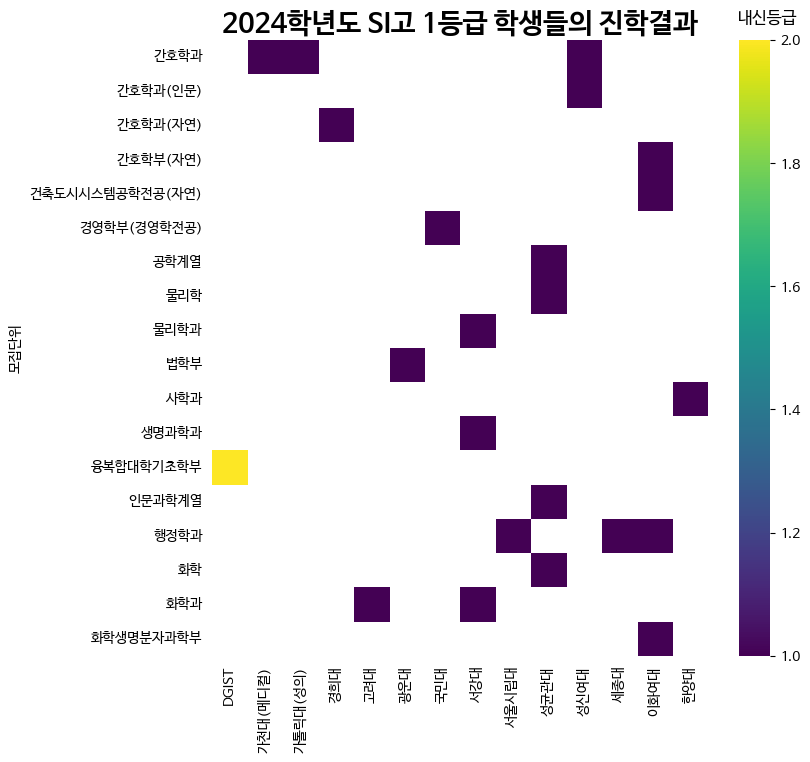

In [ ]:
#40. 특정등급대 학생들의 진학결과 그래프

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


lownum = float(input("몇등급 이상:"))
highnum = float(input("몇등급 미만:"))


# 필터링 조건에 맞는 데이터 추출
df_one = df[(df['전과목'] >= lownum) & (df['전과목'] < highnum) & (df['최종'] == '합')].copy()

plt.figure(figsize=(8, 8))
plt.title(f'2024학년도 SI고 {int(round(lownum))}등급 학생들의 진학결과',fontsize = 20, fontweight='bold')  # 제목 설정


# 그룹화 및 모집단위별 카운트, 실제 데이터에 맞춰서 df_one을 사용
df_2dhist = pd.DataFrame({
    x_label: grp['모집단위'].value_counts()
    for x_label, grp in df_one.groupby('대학')
})

# 히트맵 생성
#ax = sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt=".2f")
ax = sns.heatmap(df_2dhist, cmap='viridis')

# 히트맵 상단에 '내신등급' 텍스트 추가
# 'x'와 'y'는 텍스트가 위치할 좌표입니다. 'ha'는 가로 정렬 방식을, 'va'는 세로 정렬 방식을 지정합니다.
plt.text(x=1.12, y=1.02, s='내신등급', fontsize=12, ha='center', va='bottom', transform=ax.transAxes)


plt.tick_params(axis='both',  # 'both'는 x축과 y축 모두에 적용됩니다.
                which='both',  # 'both'는 주요(major) 및 부차적(minor) tick 모두에 적용됩니다.
                bottom=False,  # x축의 하단 tick을 삭제합니다.
                top=False,    # x축의 상단 tick을 삭제합니다.
                left=False,   # y축의 왼쪽 tick을 삭제합니다.
                right=False,  # y축의 오른쪽 tick을 삭제합니다.
                labelbottom=True,  # x축 라벨은 유지합니다.
                labelleft=True)  # y축 라벨 유지



알고 싶은 내신등급:4


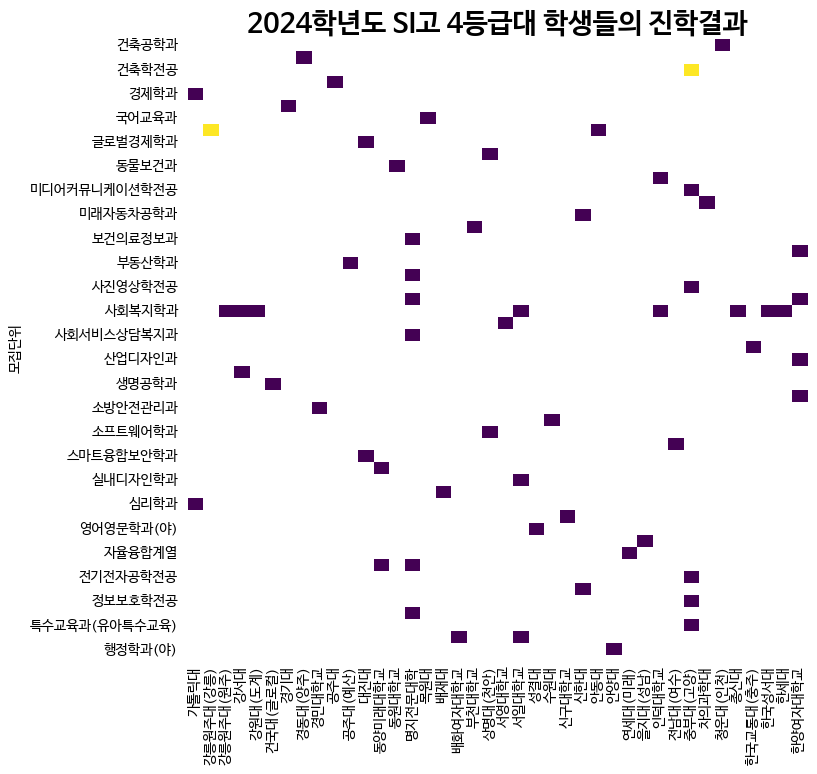

In [12]:
#X등급 학생들의 진학결과

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

x = int(input("알고 싶은 내신등급:"))

df_one = df[(df['전과목'] >= x) & (df['전과목'] < (x+1)) & (df['최종'] == '합')]

#df_one = df_one.drop_duplicates('이름')
df_one = df_one[['이름', '전과목', '전형분류', '최종', '대학', '모집단위']].sort_values(by = '전과목')

plt.figure(figsize=(8, 8))
plt.title(f'2024학년도 SI고 {x}등급대 학생들의 진학결과',fontsize = 20, fontweight='bold')  # 제목 설정


# 그룹화 및 모집단위별 카운트, 실제 데이터에 맞춰서 df_one을 사용
df_2dhist = pd.DataFrame({
    x_label: grp['모집단위'].value_counts()
    for x_label, grp in df_one.groupby('대학')
})

# 히트맵 생성
#ax = sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt=".2f")
ax = sns.heatmap(df_2dhist, cmap='viridis', cbar=False)

# 히트맵 상단에 '내신등급' 텍스트 추가



plt.tick_params(axis='both',  # 'both'는 x축과 y축 모두에 적용됩니다.
                which='both',  # 'both'는 주요(major) 및 부차적(minor) tick 모두에 적용됩니다.
                bottom=False,  # x축의 하단 tick을 삭제합니다.
                top=False,    # x축의 상단 tick을 삭제합니다.
                left=False,   # y축의 왼쪽 tick을 삭제합니다.
                right=False,  # y축의 오른쪽 tick을 삭제합니다.
                labelbottom=True,  # x축 라벨은 유지합니다.
                labelleft=True)  # y축 라벨 유지


In [2]:
#43. 의치한약수(ex: 의학 등) 합격자 명단 찾기

#df_의치한약수 = df['모집단위'].str.contains('[의치한약수]+') & ~df['모집단위'].str.contains('[ICT외류기공위료작특국]+') & ~df['모집단위'].str.contains('[물리]+')

df_의치한약수 = df['모집단위'].str.contains('[약]+') & ~df['모집단위'].str.contains('[ICT외류기공위료작특국]+') & ~df['모집단위'].str.contains('[물리]+')

subset_df = df[df_의치한약수]
subset_df_p = subset_df[(subset_df.최종 == '합')]
subset_df_p = subset_df_p[['학번', '이름', '대학', '모집단위', '전형분류', '최종', '전과목', '백분위_수능']]
print("***2024학년도 수시 의치한약수 합격자 명단***")
print(subset_df_p)
print("\n-----------------------------------------")
print("***2024학년도 수시 의치한약수 합격자수***")


#데이터 프레임으로 전환
#subset_df_p = pd.DataFrame(subset_df_p)
#결과를 엑셀로 저장
#subset_df_p.to_excel(excel_writer= '/content/drive/MyDrive/python/sinmok/susi/medical.xlsx')

***2024학년도 수시 의치한약수 합격자 명단***
Empty DataFrame
Columns: [학번, 이름, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []

-----------------------------------------
***2024학년도 수시 의치한약수 합격자수***


In [ ]:
#44. 특수대 합격자 명단

sp = ['경찰대', '육군사관학교', '해군사관학교', '공군사관학교', '국군간호사관학교', 'GIST', 'DGIST', 'UNIST', 'KAIST', '한국예술종합학교']


print("***2024학년도 수시 특수대 합격자 명단***\n")
for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['학번', '대학', '모집단위', '전형분류', '최종', '전과목', '백분위_수능' ]]
    print("%s 대학 합격자" % sp[u])
    #print("{} 대학 합격자는 {}명" .format(sp[u] len(df_특수대)))
    print(df_특수대)
    print("--------------------------------------")


print("\n-----------------------------------------")
print("***2024학년도 수시 특수대 합격자수***\n")

# 특수대 합격자수
sp = ['경찰대', '육군사관학교', '해군사관학교', '공군사관학교', '국군간호사관학교', '광주과학기술원', '대구경북과학기술원', '울산과학기술대학교', '한국과학기술원', '한국예술종합학교']

for u in range(len(sp)):
    df_특수대 = df[(df.대학 == sp[u]) & (df.최종 == '합')]
    df_특수대 = df_특수대[['학번', '대학', '모집단위', '전형분류', '최종']]
print("2024학년도 특수대 수시합격자수는 %d명입니다." % len(df_특수대))


***2024학년도 수시 특수대 합격자 명단***

경찰대 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
육군사관학교 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
해군사관학교 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
공군사관학교 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
국군간호사관학교 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
GIST 대학 합격자
Empty DataFrame
Columns: [학번, 대학, 모집단위, 전형분류, 최종, 전과목, 백분위_수능]
Index: []
--------------------------------------
DGIST 대학 합격자
        학번     대학       모집단위 전형분류 최종    전과목     백분위_수능
393  30414  DGIST  융복합대학기초학부   종합  합  1.694  81.000000
826  30717  DGIST  융복합대학기초학부   종합  합  1.541  81.833333
--------------------------------------
U

In [ ]:
#46. 모집단위에서 특정전공 검색

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

major = input("관심전공:")

#디자인이 들어간 학과
df_design = df[(df['모집단위'].str.contains(major))]


df_design_applicant = df_design.drop_duplicates('이름')
df_design_applicant = len(df_design_applicant)

#필요한 변수(열)만 불러옴
df_design = df_design[['지역', '학번', '계열', '대학', '모집단위', '최종', '전과목', '지원시기', '전형분류']]



# tabulate를 사용하여 결과 출력
print(tabulate(df_design, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")
print(f'중복제외한 지원자수는 {df_design_applicant}명')



#데이터 프레임으로 전환
df_design = pd.DataFrame(df_design)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel/'
df_design.to_excel(excel_writer= f'{path}디자인학과지원자_2024_신도고.xlsx')

관심전공:건축
지역      학번  계열    대학            모집단위                       최종      전과목  지원시기    전형분류
서울     30221  자연    동국대          건축공학부                     불         3.065  수시        교과
서울     30221  자연    숭실대          건축학부(실내건축전공)         불         3.065  수시        종합
서울     30221  인문    한양대          실내건축디자인학과             불         3.065  수시        종합
서울     30314  자연    고려대          건축사회환경공학부             불         2.087  수시        교과
서울     30405  자연    삼육대          건축학과(5년)                  불         4.684  수시        종합
서울     30407  자연    동국대          건축공학부                     불         2.388  수시        교과
서울     30407  자연    서울시립대      건축학부(건축학전공)(5년)      불         2.388  수시        교과
서울     30407  자연    숭실대          건축학부(건축학,건축공학전공)  합         2.388  수시        교과
서울     30410  자연    동양미래대학교  건축과                         합         5.853  수시1차     교과
경기     30616  자연    경민대학교      건축공간디자인과               합         7.596  수시2차     교과
******************************************************

In [ ]:
#47. 전형분류에서 특정전형 검색

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


type = input("전형(ex:교과, 종합, 논술, 실기):")

#디자인이 들어간 학과
df_design = df[(df['전형분류'].str.contains(type))]


df_design_applicant = df_design.drop_duplicates('이름')
df_design_applicant = len(df_design_applicant)



#필요한 변수(열)만 불러옴
df_design = df_design[['전형분류', '지역', '학번', '계열', '이름', '대학', '모집단위', '최종', '전과목', '지원시기']]



# tabulate를 사용하여 결과 출력
print(tabulate(df_design, headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")
print(f'중복제외한 지원자수는 {df_design_applicant}명')



#데이터 프레임으로 전환
df_design = pd.DataFrame(df_design)


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel/'
df_design.to_excel(excel_writer= f'{path}실기전형지원자_2024_신도고.xlsx')

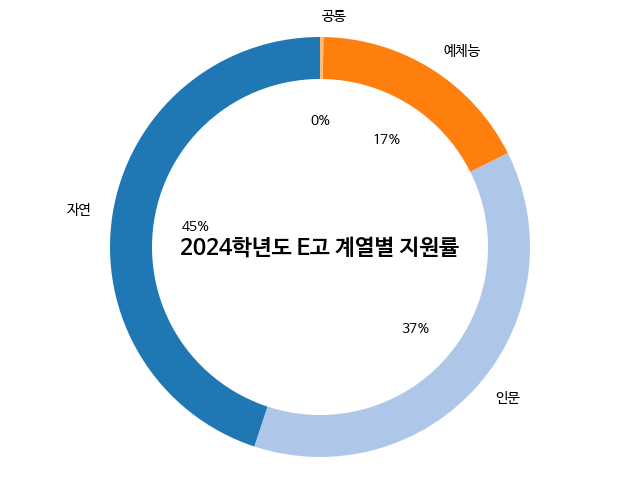

In [ ]:
#48. 계열별 지원비율(ex: 인문, 자연, 예체능)

import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

# 전체 학생 수 계산
total_students = len(df)

# '계열' 열에서 groupby로 빈도와 비율 계산
dept_counts = df['계열'].value_counts()
dept_ratio = dept_counts / total_students

# 도넛차트로 빈도와 비율 표현
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(dept_counts, labels=dept_counts.index, autopct='%1.0f%%', startangle=90, colors=plt.cm.tab20.colors)
ax.axis('equal')

# 도넛 형태 생성
center_circle = plt.Circle((0,0),0.80,fc='white')
fig.gca().add_artist(center_circle)

# 제목 추가
plt.text(0, 0, '2024학년도 SI고 계열별 지원률', horizontalalignment='center', verticalalignment='center', fontsize=16, fontweight='bold')

plt.show()


In [ ]:
#49. 특정계열의 합격률

adtype = input("계열(ex: 인문, 자연, 예체능)")

arts_students = df[df['계열'] == adtype]

# '최종' 열에서 '합'인 행 선택
pass_students = arts_students[arts_students['최종'] == '합']

# '계열' 열이 '예체능'인 학생들의 합격률 계산
pass_rate = len(pass_students) / len(arts_students) * 100

print(f"{adtype} 학생들의 합격률 {pass_rate}%")

계열(ex: 인문, 자연, 예체능)예체능
예체능 학생들의 합격률 27.611940298507463%


In [ ]:
#50. 특정계열의 합격자

adtype = input("계열(ex: 인문, 자연, 예체능)")


# '계열' 열이 '예체능'인 행 필터링
arts_students = df[df['계열'] == adtype]

# '최종' 열에서 '합'인 행 선택
pass_students = arts_students[arts_students['최종'] == '합']


#반올림
pass_students['전과목'] = pass_students['전과목'].round(1)

# '최종' 열에서 '합'인 학생들의 '학번', '대학', '모집단위' 열 출력
pass_students_info = pass_students[['대학', '계열', '모집단위', '최종', '전과목']]


# '전과목' 열 값을 오름차순으로 정렬
pass_students_info_sorted = pass_students_info.sort_values(by='전과목')


# tabulate를 사용하여 결과 출력
print(tabulate(pass_students_info_sorted, headers='keys', tablefmt='plain', showindex=False))



#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel/'
pass_students_info_sorted.to_excel(excel_writer= f'{path}예체능전형합격자_2024_신도고.xlsx')

계열(ex: 인문, 자연, 예체능)예체능
대학              계열    모집단위                            최종      전과목
성신여대          예체능  디자인과                            합           2.8
인하대            예체능  의류디자인학과(실기)                합           3.3
세종대            예체능  영화예술학과(연출제작전공)          합           3.5
명지전문대학      예체능  디지털콘텐츠융합과                  합           4.1
연성대학교        예체능  반려동물보건과                      합           4.2
명지전문대학      예체능  뷰티매니지먼트과(뷰티스킨케어전공)  합           4.2
경인여자대학교    예체능  뷰티디자인학과 뷰티케어전공         합           4.7
세종대            예체능  영화예술학과(연출제작전공)          합           4.7
백제예술대학교    예체능  실용음악과                          합           4.7
경동대(양주)      예체능  스포츠마케팅학과                    합           4.8
동양미래대학교    예체능  시각디자인과                        합           4.9
신한대(의정부)    예체능  공연예술학과(연기)                  합           5.4
명지전문대학      예체능  연극영상학과                        합           5.4
중부대(고양)      예체능  연극영화학전공(연기)                합           5.4
백석예술대학교    예체능  공연예술학부(뮤지컬)                합           5.4

<ipython-input-33-0410fd981239>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_students['전과목'] = pass_students['전과목'].round(1)


In [ ]:
[columns for columns in df.columns if '전형' in columns]

['전형명', '전형종류', '전형일자', '전형분류', '전형방법']

In [ ]:
#51. 특정학과의 특정등급일때 결과

from tabulate import tabulate


major = input("모집단위:")
level_min =  float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))


#4년제 지원자수(중복포함)
df_nurse = df[(df.모집단위.str.contains(major))]

#df_nurse = df_nurse[df_nurse['최종'] == '합']

df_nurse = df_nurse[(df_nurse['전과목'] > level_min) & (df_nurse['전과목'] < level_max) ]

df_nurse['전과목'] = df_nurse['전과목'].round(1)

df_nurse =  df_nurse[['전과목', '대학', '모집단위', '최종', '전형분류', '전형명', '전형방법']]



# tabulate를 사용하여 결과 출력
print(tabulate(df_nurse, headers='keys', tablefmt='plain', showindex=False))


#결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel/'
df_nurse.to_excel(excel_writer= f'{path}간호학과합격자_2024_3.5등급.xlsx')

모집단위:국어
높은 등급:3
낮은 등급:4
  전과목  대학            모집단위              최종    전형분류    전형명                      전형방법
     3.5  동국대          국어국문문예창작학부  합      실기        실기(국어국문문예창작학부)  학생부 30% + 실기 70%
     3.7  가천대(글로벌)  외국어계열            불      교과        지역균형                    1단계:【7배수】학생부 100%
                                                                                                2단계:면접 50% + 1단계성적 50%


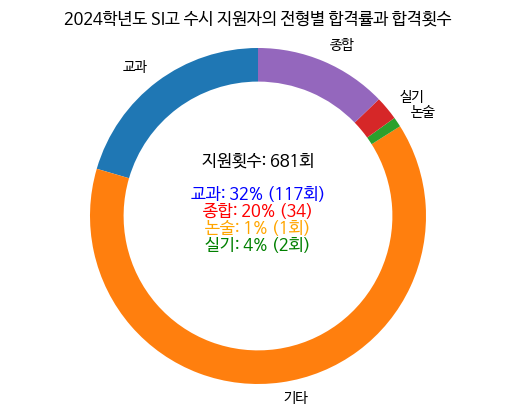

In [13]:
#52. 전형별 합격률과 합격횟수

import pandas as pd
import matplotlib.pyplot as plt

# 조건에 따라 데이터 필터링
filtered_df = df[df['지원시기'] == '수시']

# 각 전형분류별 합격자 수 계산
pass_counts = filtered_df.groupby('전형분류')['최종'].value_counts().unstack().fillna(0)['합']

# 각 전형분류별 합격률 계산
pass_rates = filtered_df.groupby('전형분류')['최종'].value_counts(normalize=True).unstack().fillna(0)['합']

# 도넛 차트 생성
labels = pass_rates.index
sizes = pass_rates.values * 100
fig, ax = plt.subplots()
#ax.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.2))
ax.pie(sizes, labels=labels, startangle=90, wedgeprops=dict(width=0.2))

ax.axis('equal')

# 도넛 차트 내부에 비율과 빈도 표현
ax.text(0, 0.3, f"지원횟수: {len(filtered_df)}회", ha='center', fontsize=12, color='black')
ax.text(0, 0.1, f"교과: {pass_rates['교과'] * 100:.0f}% ({int(pass_counts['교과'])}회)", ha='center', fontsize=12, color='blue')
ax.text(0, 0, f"종합: {pass_rates['종합'] * 100:.0f}% ({int(pass_counts['종합'])})", ha='center', fontsize=12, color='red')
ax.text(0, -0.1, f"논술: {pass_rates['논술'] * 100:.0f}% ({int(pass_counts['논술'])}회)", ha='center', fontsize=12, color='orange')
ax.text(0, -0.2, f"실기: {pass_rates['실기'] * 100:.0f}% ({int(pass_counts['실기'])}회)", ha='center', fontsize=12, color='green')



plt.title('2024학년도 SI고 수시 지원자의 전형별 합격률과 합격횟수')
plt.show()

In [ ]:
#53. 모집단위(학과)별 지원자

from tabulate import tabulate

path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

major = input("모집단위:")

#4년제 지원자수(중복포함)
uni_apply = df[(df.모집단위.str.contains(major))]

print(uni_apply[['대학', '모집단위', '최종', '전과목', '등급_수능']])

모집단위:태권
           대학          모집단위 최종    전과목  등급수능
591  가천대(글로벌)         태권도전공  불  6.906   NaN
592  신한대(의정부)         태권도학부  합  6.906   NaN
593       용인대         태권도학과  불  6.906   NaN
594     한국체육대         태권도학과  불  6.906   NaN
595       상지대  체육학부(태권도학전공)  합  6.906   NaN
620  가천대(글로벌)         태권도전공  불  5.990   7.6
621  신한대(의정부)         태권도학부  합  5.990   7.6
622       용인대         태권도학과  불  5.990   7.6


In [6]:
#54. 등급대별 수시 합격자 확인

from tabulate import tabulate


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


level_min =  float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))

apply_type = input("전형분류:")
result = input("최종(합, 불):")


#4년제 지원자수(중복포함)
df_nurse = df[(df.전형분류.str.contains(apply_type))]

df_nurse = df_nurse[df_nurse['최종'] == result]

df_nurse = df_nurse[(df_nurse['전과목'] >= level_min) & (df_nurse['전과목'] < level_max)]

#전과목 값으로 오름차순으로 정렬
df_nurse = df_nurse.sort_values(by= '전과목', ascending = True)


df_nurse['전과목'] = df_nurse['전과목'].round(2)

df_nurse =  df_nurse[['이름', '전과목', '대학', '모집단위', '최종', '전형분류', '전형명', '전형방법']]

df_nurse_num = len(df_nurse)


print(f"종합전형 {result}건수 {df_nurse_num}건")

# tabulate를 사용하여 결과 출력
print(tabulate(df_nurse, headers='keys', tablefmt='plain', showindex=False))

높은 등급:1
낮은 등급:2
전형분류:교과
최종(합, 불):합
종합전형 합건수 16건
  이름    전과목  대학            모집단위                      최종    전형분류    전형명          전형방법
   nan      1.54  고려대          화학과                        합      교과        학교추천        학생부80%+서류20%
   nan      1.54  서강대          화학과                        합      교과        고교장추천      학생부100%
   nan      1.54  성균관대        화학                          합      교과        학교장추천      학생부100%
   nan      1.55  서강대          생명과학과                    합      교과        고교장추천      학생부100%
   nan      1.55  이화여대        화학생명분자과학부            합      교과        고교추천        학생부80%+면접20%
   nan      1.55  성균관대        공학계열                      합      교과        학교장추천      학생부100%
   nan      1.62  성신여대        간호학과(인문)                합      교과        지역균형        학생부100%
   nan      1.62  가톨릭대(성의)  간호학과                      합      교과        지역균형        학생부100%
   nan      1.69  성균관대        물리학                        합      교과        학교장추천      학생부100%
   nan      1.69  서강대      

In [12]:
#54. 등급대별 수시 합격자 확인: 전형분류 및 합불 구분하지 않고 출력

from tabulate import tabulate


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


level_min =  float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))


#4년제 지원자수(중복포함)
df_nurse = df[(df['전과목'] >= level_min) & (df['전과목'] < level_max)]

#전과목 값으로 오름차순으로 정렬
df_nurse = df_nurse.sort_values(by= '전과목', ascending = True)


df_nurse['전과목'] = df_nurse['전과목'].round(2)
df_nurse['등급_수능'] = df_nurse['등급_수능'].round(2)


df_nurse =  df_nurse[['전과목', '등급_수능', '대학', '모집단위', '최종', '전형분류']]

df_nurse_num = len(df_nurse)


print(f"종합전형 {result}건수 {df_nurse_num}건")

# tabulate를 사용하여 결과 출력
print(tabulate(df_nurse, headers='keys', tablefmt='plain', showindex=False))

높은 등급:1
낮은 등급:2
종합전형 합건수 63건
  전과목    등급_수능  대학            모집단위                      최종    전형분류
    1.54         2.25  DGIST           융복합대학기초학부            합      종합
    1.54         2.25  KAIST           전학부                        불      종합
    1.54         2.25  연세대          화학과                        불      교과
    1.54         2.25  성균관대        화학                          합      교과
    1.54         2.25  서강대          화학과                        합      교과
    1.54         2.25  서울대          화학부                        불      종합
    1.54         2.25  고려대          화학과                        불      종합
    1.54         2.25  고려대          화학과                        합      교과
    1.54         2.25  UNIST           이공계열                      불      종합
    1.55         2.62  성균관대        공학계열                      합      교과
    1.55         2.62  고려대          바이오의공학부                불      교과
    1.55         2.62  이화여대        화학생명분자과학부            합      교과
    1.55         2.62  연세대          시스템

In [17]:
#55. 등급대별 수능최저등급 충족여부

import numpy as np
import pandas as pd
from tabulate import tabulate
import math  # 절사를 위해 math 모듈 추가

# 입력 받기
level_min = float(input("내신 높은 등급:"))
level_max = float(input("내신 낮은 등급:"))

choice = input("탐구1과 탐구2의 평균등급을 사용하시겠습니까? (예/아니오): ")

# '수능'을 제외한 값 필터링
df_filtered = df[df['전형분류'] != '수능']

# 범위에 따른 '전과목' 값 필터링
df_level = df_filtered[(df_filtered['전과목'] >= level_min) & (df_filtered['전과목'] < level_max)].copy()

# 데이터 프레임 필터링
df_level = df_level.drop_duplicates('전과목')
df_level = df_level[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급']]

# '이름' 열의 값을 첫 글자만 남기고 나머지는 '*'로 대체
#df_level['이름'] = df_level['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

# 열 이름 변경
df_level.rename(columns={'선택1_등급': '탐구1_등급', '선택2_등급': '탐구2_등급'}, inplace=True)


# NaN 값을 0으로 대체
df_level.fillna(0, inplace=True)

# 평균 사용 여부에 따른 조건 처리
if choice.lower() == '예':
    trunc_choice = input("탐구1과 탐구2의 평균을 절사하시겠습니까? (예/아니오): ")
    if trunc_choice.lower() == '예':
        df_level['탐구_등급'] = df_level[['탐구1_등급', '탐구2_등급']].mean(axis=1).apply(math.floor)
    else:
        df_level['탐구_등급'] = df_level[['탐구1_등급', '탐구2_등급']].mean(axis=1)
    columns = ['국어_등급', '수학_등급', '영어_등급', '탐구_등급']
else:
    columns = ['국어_등급', '수학_등급', '영어_등급', '탐구1_등급', '탐구2_등급']

# 최저합 계산
df_level['4합'] = df_level[columns].apply(lambda x: x.nsmallest(4).sum(), axis=1)
df_level['3합'] = df_level[columns].apply(lambda x: x.nsmallest(3).sum(), axis=1)
df_level['2합'] = df_level[columns].apply(lambda x: x.nsmallest(2).sum(), axis=1)


# '전과목' 열을 오름차순으로 정렬
df_level = df_level.sort_values(by='전과목', ascending=True)


# 결과 출력
headers = ['전과목', '국어_등급', '수학_등급', '영어_등급']
if choice.lower() == '예':
    headers.append('탐구_등급')
else:
    headers.extend(['탐구1_등급', '탐구2_등급'])
headers.extend(['2합', '3합', '4합'])


tab = tabulate(df_level[headers], headers='keys', tablefmt='plain', showindex=False)
print()
print(tab)

# 데이터 프레임으로 전환은 불필요함
# 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_habbul/'
#df_level.to_excel(excel_writer=f'{path}{level_min}등급대_수능최저등급조합_2024_신도고_익명.xlsx', index=False)

내신 높은 등급:1
내신 낮은 등급:2
탐구1과 탐구2의 평균등급을 사용하시겠습니까? (예/아니오): 예
탐구1과 탐구2의 평균을 절사하시겠습니까? (예/아니오): 예

  전과목    국어_등급    수학_등급    영어_등급    탐구_등급    2합    3합    4합
   1.541            5            1            1            2      2      4      9
   1.551            1            2            3            4      3      6     10
   1.62             1            2            3            5      3      6     11
   1.622            1            4            1            1      2      3      7
   1.694            3            2            1            4      3      6     10
   1.765            3            4            3            7      6     10     17
   1.786            5            4            2            4      6     10     15
   1.837            2            3            4            2      4      7     11
   1.857            3            4            3            4      6     10     14
   1.98             3            4            2            5      5      9     14


In [22]:
#55-1. 수능최저등급 개인별 자동확인

import numpy as np
from tabulate import tabulate
import math  # 절사를 위해 math 모듈 추가

# 사용자 입력 받기
name = float(input('전과목:'))
choice = input("탐구1과 탐구2'의 평균등급을 사용하시겠습니까? (예/아니오): ")

# 데이터 프레임 필터링
df_kim = df[df['전과목'] == name]
df_kim = df_kim.drop_duplicates('전과목')
df_kim = df_kim[['국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급']]

# 열 이름 변경
df_kim.rename(columns={'선택1_등급': '탐구1_등급', '선택2_등급': '탐구2_등급'}, inplace=True)

# 평균 사용 여부에 따른 조건 처리
if choice.lower() == '예':
    trunc_choice = input("탐구1과 탐구2의 평균을 절사하시겠습니까? (예/아니오): ")
    if trunc_choice.lower() == '예':
        df_kim['탐구_등급'] = df_kim[['탐구1_등급', '탐구2_등급']].mean(axis=1).apply(math.floor)
    else:
        df_kim['탐구_등급'] = df_kim[['탐구1_등급', '탐구2_등급']].mean(axis=1)
    columns = ['국어_등급', '수학_등급', '영어_등급', '탐구_등급']
else:
    columns = ['국어_등급', '수학_등급', '영어_등급', '탐구1_등급', '탐구2_등급']

# 최저합 계산
df_kim['4합'] = df_kim[columns].apply(lambda x: x.nsmallest(4).sum(), axis=1)
df_kim['3합'] = df_kim[columns].apply(lambda x: x.nsmallest(3).sum(), axis=1)
df_kim['2합'] = df_kim[columns].apply(lambda x: x.nsmallest(2).sum(), axis=1)

# 결과 출력
headers = ['국어_등급', '수학_등급', '영어_등급']
if choice.lower() == '예':
    headers.append('탐구_등급')
else:
    headers.extend(['탐구1_등급', '탐구2_등급'])
headers.extend(['2합', '3합', '4합'])
tab = tabulate(df_kim[headers], headers='keys', tablefmt='plain', showindex=False)
print() ; print(tab)

전과목: 1.857
탐구1과 탐구2'의 평균등급을 사용하시겠습니까? (예/아니오): 예
탐구1과 탐구2의 평균을 절사하시겠습니까? (예/아니오): 예

  국어_등급    수학_등급    영어_등급    탐구_등급    2합    3합    4합
          3            4            3            4      6     10     14


In [32]:
#56. 등급대별 수시 지원조합: 이름 나오는 버전

import pandas as pd
from tabulate import tabulate



##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

# 입력 받기
level_min = float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))

# '수능'을 제외한 값 필터링
df_filtered = df[df['전형분류'] != '수능']

# 범위에 따른 '전과목' 값 필터링
df_level = df_filtered[(df_filtered['전과목'] >= level_min) & (df_filtered['전과목'] < level_max)].copy()

# 전과목 내신 소수점 첫째자리까지 표시
#df_level['전과목'] = df_level['전과목'].round(2)


# '전형분류'의 빈도수를 카운트하여 피벗 테이블 생성
pivot_table = df_level.pivot_table(index=('전과목'), columns='전형분류', aggfunc='size', fill_value=0)


# '이름', '교과', '종합', '실기', '논술' 열로 정렬
result = pivot_table.reindex(columns=['교과', '종합', '실기', '논술'], fill_value=0).reset_index()

# '전과목' 열의 값의 오름차순으로 정렬
result = result.sort_values(by='전과목').reset_index(drop=True)


# 교과, 종합, 실기, 논술의 평균 계산
averages = result[['교과', '종합', '실기', '논술']].mean().round(1)
average_row = pd.DataFrame([['평균', averages['교과'], averages['종합'], averages['실기'], averages['논술']]],
                           columns=result.columns)


# 결과에 평균 행 추가
result = pd.concat([result, average_row], ignore_index=True)

# 결과 출력
print(tabulate(result, headers='keys', tablefmt='plain'))


# 데이터 프레임으로 전환
result_df = pd.DataFrame(result)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel/'
result_df.to_excel(excel_writer=f'{path}{level_min}등급대_수시전형_지원조합_2024_신도고.xlsx', index=False)


높은 등급:1
낮은 등급:2
    전과목      교과    종합    실기    논술
 0  1.541        4       5         0       0
 1  1.551        5       0         0       0
 2  1.62         4       2         0       0
 3  1.622        3       3         0       0
 4  1.694        5       3         0       0
 5  1.765        4       2         0       0
 6  1.786        5       1         0       0
 7  1.837        3       3         0       0
 8  1.857        2       3         0       0
 9  1.98         1       5         0       0
10  평균         3.6     2.7       0       0


In [ ]:
#57. 특정계열 지원자 출력

adtype = input("계열(ex: 인문, 자연, 예체능)")

df_pyj = df[df['모집단위'].str.contains(adtype)]

df_pyj = df_pyj[['계열', '학번', '이름',  '대학', '모집단위', '전형분류', '최종', '전과목']]
print(df_pyj.iloc[:60, ])

계열(ex: 인문, 자연, 예체능)자연
     계열     학번   이름    대학             모집단위 전형분류 최종    전과목
33   자연  30107  김유리  이화여대          의예과(자연)   종합  불  1.125
80   자연  30117  윤벼리  이화여대  기후에너지시스템공학과(자연)   교과  합  1.683
101  자연  30121  조하민  성균관대           자연과학계열   종합  불  1.760
317  자연  30305  김서경   중앙대         간호학과(자연)   종합  불  2.944
381  자연  30314  송은재   홍익대  서울캠퍼스자율전공(자연예능)   교과  불  2.087
459  자연  30403  김동준   중앙대           자연과학대학   교과  불  2.231


In [ ]:
#58. 이름으로 해당학생 수능 과목별 등급 출력

from tabulate import tabulate

#이름 입력받기
name = input('이름:')

df_name = df[(df.이름 == name)]
df_name = df_name[['대학', '모집단위', '최종','전형분류', '전과목',  '백분위_수능', '등급_수능' ]]

# Define the table headers
table_headers = ['대학', '모집단위', '최종','전형분류', '전과목',  '백분위_수능', '등급_수능']


# Create the formatted table using tabulate
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)

이름:원영민
****************************************************************************************************************************
     대학            모집단위            최종    전형분류      전과목    백분위수능    등급수능
596  국민대          정보보안암호수학과  불      종합           2.653          46.7         4.4
597  가천대(글로벌)  도시계획조경학부    합      교과           2.653          46.7         4.4
598  경희대          수학과              불      종합           2.653          46.7         4.4
599  서울시립대      수학과              불      종합           2.653          46.7         4.4
600  한양대          수학교육과          불      종합           2.653          46.7         4.4
601  한국항공대      항공우주공학과      합      교과           2.653          46.7         4.4


In [ ]:
# 대학으로 해당학생 수능 과목별 등급 출력

from tabulate import tabulate

#이름 입력받기
name = input('대학:')

df_name = df[(df.대학 == name) & (df.최종 == '합')]
df_name = df_name[['이름', '대학', '모집단위', '최종','전형분류', '전과목',  '백분위_수능', '등급_수능']]

# Define the table headers
table_headers = ['이름', '대학', '모집단위', '최종', '전형분류', '전과목', '백분위_수능', '등급_수능']


# Create the formatted table using tabulate
table_string = tabulate(df_name, headers=table_headers, tablefmt='plain')
print("****************************************************************************************************************************")
print(table_string)

대학:상명대
****************************************************************************************************************************
     이름    대학    모집단위                        최종    전형분류      전과목    백분위수능    등급수능
  8  김나윤  상명대  외식의류학부(식품영양학전공)    합      종합           3.554         nan         nan
264  지성윤  상명대  공간환경학부                    합      종합           3.065          54.7         4.5
476  박준우  상명대  생명화학공학부(화공신소재전공)  합      교과           2.388          66.3         3.5
491  양기훈  상명대  경영학부                        합      교과           2.582          46           4.8
626  황호영  상명대  지능데이터융합학부              합      교과           2.684          61.7         3.8


In [ ]:
#59. 특정대(ex: 서,연,고)는 제외하고 특정대는 포함하는 대학 합격자수

ace_a = ['서울대', '연세대', '고려대']
ace_b = ['서강대', '성균관대', '한양대']


#지역
seoul_df = df[df.지역 == '서울']
seoul_df

#ace제외하는 df: ~이 not의 의미
seoul_other_df = seoul_df[~seoul_df['대학'].isin(ace_a) & seoul_df['대학'].isin(ace_b) & (seoul_df['최종'] == '합')]
seoul_other_df

,학번,이름,지역,대학,지원시기,전형명,계열,모집단위,1단계,최종,...,선택2_백분위,선택2_등급,한국사_등급,제2외국어_과목명,제2외국어_등급,표점합수능,백분위수능,등급수능,이름_대학_모집단위_최종_표점합수능_백분위수능_등급수능,대학_모집단위_최종_표점합수능_백분위수능_등급수능


In [ ]:
#지원시기별 빈도 계산
frequency = df.groupby('지원시기').size().reset_index(name='빈도')
print(frequency)

In [ ]:
#유승희t

from tabulate import tabulate

# '전과목' 열을 기준으로 오름차순 정렬
sorted_df = df.sort_values(by='전과목', ascending=True)

sorted_df= sorted_df[['학번', '전과목', '대학', '모집단위', '전형분류', '최종', '전형방법', '백분위_수능']]



# tabulate를 사용하여 결과 출력
print(tabulate(sorted_df.head(30), headers='keys', tablefmt='plain', showindex=False))
print("********************************************************************")

# 데이터 프레임으로 전환
result_df = pd.DataFrame(sorted_df)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/'
result_df.to_excel(excel_writer=f'{path}1등급대_합격현황_신도고.xlsx', index=False)

  학번    전과목  대학            모집단위            전형분류    최종    전형방법                      백분위_수능
 30717     1.541  연세대          화학과              교과        불      1단계:[5배수]학생부100%           81.8333
                                                                          2단계:면접40%+1단계성적60%
 30717     1.541  성균관대        화학                교과        합      학생부100%                        81.8333
 30717     1.541  서울대          화학부              종합        불      1단계:[2배수]서류100%             81.8333
                                                                          2단계:1단계성적50%+면접50%
 30717     1.541  서강대          화학과              교과        합      학생부100%                        81.8333
 30717     1.541  고려대          화학과              종합        불      1단계:[6배수]서류100%             81.8333
                                                                          2단계:면접30%+1단계성적70%
 30717     1.541  고려대          화학과              교과        합      학생부80%+서류20%                 81.8333
 30717     1.541  K

In [ ]:
top_5_values = df.drop_duplicates('학번')
top_5_values = top_5_values['백분위_수능'].nlargest(5)

print(top_5_values)

461    98.500000
30     92.500000
530    88.000000
620    86.000000
93     83.833333
Name: 백분위_수능, dtype: float64


In [34]:
#신도고 표준점수 350점이상 수

df_350more = df[df['표점합_수능'] >= 350]
df_350more = df_350more.drop_duplicates('학번')
df_350more_num = len(df_350more)
print(f'2024학년도 신도고 350점이상 학생수(중복제외)는 {df_350more_num}명')

2024학년도 신도고 350점이상 학생수(중복제외)는 10명


In [37]:
#신도고 백분위평균이 80%이상 수

#백분위수능 입력받기
centtile = float(input("백분위수능점수:"))

df_350more = df[df['백분위_수능'] >= centtile ]
df_350more = df_350more.drop_duplicates('학번')


#백분위수능점수를 정수로 표현
centtile = int(centtile)

df_350more_num = len(df_350more)
print(f'2024학년도 신도고 {centtile}%이상 학생수(중복제외)는 {df_350more_num}명')

백분위수능점수:80
2024학년도 신도고 80%이상 학생수(중복제외)는 7명


In [33]:
df.columns

Index(['학번', '이름', '지역', '대학', '지원시기', '전형명', '계열', '모집단위', '1단계', '최종', '예비',
       '등록', '비고', '전형종류', '전형일자', '1단계발표일', '최종발표일', '최저학력기준', '모집인원', '전형분류',
       '전형방법', '전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회',
       '과학', '비교과', '국어_국어영역', '국어_원점수', '국어_표준점수', '국어_백분위', '국어_등급',
       '수학_수학영역', '수학_원점수', '수학_표준점수', '수학_백분위', '수학_등급', '영어_원점수', '영어_표준점수',
       '영어_백분위', '영어_등급', '탐구영역', '선택1_과목명', '선택1_원점수', '선택1_표준점수', '선택1_백분위',
       '선택1_등급', '선택2_과목명', '선택2_원점수', '선택2_표준점수', '선택2_백분위', '선택2_등급',
       '한국사_원점수', '한국사_표준점수', '한국사_백분위', '한국사_등급', '제2외국어_과목명', '제2외국어_원점수',
       '제2외국어_표준점수', '제2외국어_백분위', '제2외국어_등급', '표점합_수능', '백분위_수능', '등급_수능'],
      dtype='object')

In [ ]:
#56-2. 등급대별 수시 지원조합: 실명

import pandas as pd
from tabulate import tabulate

##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

# 입력 받기
level_min = float(input("높은 등급:"))
level_max = float(input("낮은 등급:"))

# '수능'을 제외한 값 필터링
df_filtered = df[df['전형분류'] != '수능']

# 범위에 따른 '전과목' 값 필터링
df_level = df_filtered[(df_filtered['전과목'] >= level_min) & (df_filtered['전과목'] < level_max)].copy()

# 전과목 내신 소수점 첫째자리까지 표시
df_level['전과목'] = df_level['전과목'].round(3)


# '전형분류'의 빈도수를 카운트하여 피벗 테이블 생성
pivot_table = df_level.pivot_table(index=('학번', '전과목'), columns='전형분류', aggfunc='size', fill_value=0)


# '익명', '전과목', '교과', '종합', '실기', '논술' 열로 정렬
result = pivot_table.reset_index().reindex(columns=['학번', '전과목', '교과', '종합', '실기', '논술'], fill_value=0)

# '전과목' 열의 값의 오름차순으로 정렬
result = result.sort_values(by='전과목').reset_index(drop=True)

# 교과, 종합, 실기, 논술의 평균 계산
averages = result[['교과', '종합', '실기', '논술']].mean().round(1)
average_row = pd.DataFrame([['평균', '', averages['교과'], averages['종합'], averages['실기'], averages['논술']]],
                           columns=result.columns)

# 결과에 평균 행 추가
result = pd.concat([result, average_row], ignore_index=True)

# '지원총횟수' 열 추가 및 값 계산
result['지원총횟수'] = result[['교과', '종합', '실기', '논술']].sum(axis=1)

# 결과 출력
print(tabulate(result, headers='keys', tablefmt='plain'))

높은 등급:1
낮은 등급:2
    학번    전과목      교과    종합    실기    논술    지원총횟수
 0  30717   1.541        4       5         0       0           9
 1  30520   1.551        5       0         0       0           5
 2  30118   1.62         4       2         0       0           6
 3  30607   1.622        3       3         0       0           6
 4  30414   1.694        5       3         0       0           8
 5  30205   1.765        4       2         0       0           6
 6  30621   1.786        5       1         0       0           6
 7  30516   1.837        3       3         0       0           6
 8  30305   1.857        2       3         0       0           5
 9  30401   1.98         1       5         0       0           6
10  평균                 3.6     2.7       0       0           6.3


In [6]:
#등급별 검색

df_four = df[(df['전과목'] >= 2.3)  & (df['전과목'] < 2.7)]
#df_four = df_four[df_four['최종'] == '합'].copy()

#전과목 별 소트
df_four = df_four.sort_values(by='전과목', ascending=True)


df_four = df_four[['전과목', '대학', '모집단위', '전형분류', '최종', '전형방법', '백분위_수능']]
df_four

,전과목,대학,모집단위,전형분류,최종,전형방법,백분위_수능
737,2.348,연세대,노어노문학과,교과,합,1단계:[5배수]학생부100%\n2단계:면접40%+1단계성적60%,59.666667
736,2.348,홍익대,법학부,교과,불,학생부100%,59.666667
735,2.348,홍익대,법학부,종합,불,서류100%,59.666667
734,2.348,이화여대,소비자학과,종합,불,서류100%,59.666667
733,2.348,국민대,법학부,교과,불,학생부100%,59.666667
732,2.348,경희대,관광엔터테인먼트학부,종합,불,1단계:[3배수]서류100%\n2단계:면접30%+1단계성적70%,59.666667
583,2.490,국민대,국제통상학과,교과,합,학생부100%,65.333333
587,2.490,한국외대,EICC학과,논술,불,학생부30%+논술70%,65.333333
586,2.490,이화여대,스크랜튼학부,논술,불,학생부30%+논술70%,65.333333
585,2.490,홍익대,서울캠퍼스자율전공(인문예능),논술,불,학생부10%+논술90%,65.333333


In [ ]:
# 특정학과별(모집단위) 지원횟수, 합격횟수, 불합격횟수, 합격률

import pandas as pd
from tabulate import tabulate


# 모집단위 입력 받기
uni = input("모집단위: ")

# 모집단위와 '최종' 열이 '합' 또는 '불'인 행 필터링
mask = df['모집단위'].notna() & df['모집단위'].str.contains(uni, na=False)
df_filtered = df[mask].copy()


# '전과목' 열의 값의 오름차순으로 정렬
df_filtered = df_filtered.sort_values(by='전과목').reset_index(drop=True)


# '합'과 '불' 빈도 계산
count_total = len(df_filtered)
count_pass = len(df_filtered[df_filtered['최종'].str.contains('합', na=False)])
count_fail = len(df_filtered[df_filtered['최종'].str.contains('불', na=False)]) + len(df_filtered[df_filtered['최종'].isna()])

# '합'의 백분율 계산
percentage_pass = (count_pass / count_total) * 100 if count_total > 0 else 0


#df_filtered['전과목'] = df_filtered['전과목'].round(2)
df_filtered.loc[:, '전과목'] = df_filtered['전과목'].round(2)


# 필요한 컬럼 선택
columns_required = ['학번', '지역', '이름', '대학', '모집단위', '최종', '전과목', '전형명', '전형분류', '전형방법']
df_subset = df_filtered[columns_required]



# Show first one letter and replace the rest of the letters with an asterisk in '이름' column
df_subset.loc[:, '이름'] = df_subset['이름'].apply(lambda x: x[:1] + '*' * (len(x) - 1) if len(x) >= 2 else x)

# 테이블 형태로 출력
table_string = tabulate(df_subset, headers=columns_required, tablefmt='plain', showindex=False)

print()
print(f"{uni}에 지원한 학생 명단")
print("**********************************************************************************************************************************************")
print(table_string)
print()
print(f"{uni} 모집단위 지원횟수: {count_total}건")
print("**********************************************************************************************************************************************")
print(f"{uni} 모집단위 합격횟수: {count_pass}건, 불합격 횟수: {count_fail}건")
print()
print(f"{uni} 모집단위의 합격률: {percentage_pass:.1f}%")


# 데이터 프레임으로 전환
result_df = pd.DataFrame(df_subset)

# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_d/'
result_df.to_excel(excel_writer=f'{path}수시{uni}학과합격자_2024_신도고.xlsx', index=False)

In [4]:
#미스테리 학생 추적

#내신성적을 입력받기
nesin = float(input("내신:"))


df_extreme = df[(df['전과목'] == nesin)]
df_extreme = df_extreme[['학번', '전과목', '등급_수능', '표점합_수능', '백분위_수능']]
df_extreme

내신:2.3


,학번,전과목,등급_수능,표점합_수능,백분위_수능


In [75]:
df_yon = df[df['대학'] == '고려대']
df_yon = df_yon[['학번', '모집단위', '전형분류', '최종', '전과목', '등급_수능', '백분위_수능']]
df_yon

,학번,모집단위,전형분류,최종,전과목,등급_수능,백분위_수능
91,30118,간호대학,교과,불,1.620,2.750,78.333333
180,30205,건축사회환경공학부,교과,불,1.765,4.375,58.500000
340,30401,가정교육과,교과,불,1.980,3.625,64.166667
392,30414,기계공학부,종합,불,1.694,2.625,81.000000
544,30520,바이오의공학부,교과,불,1.551,2.625,83.666667
612,30607,역사교육과,교과,불,1.622,1.750,86.000000
810,30717,화학과,교과,합,1.541,2.250,81.833333
811,30717,화학과,종합,불,1.541,2.250,81.833333


In [ ]:
#67-1. 내신, 전형분류, 대학, 모집단위 순으로 출력

import pandas as pd
from tabulate import tabulate




# '최종' 열의 값이 '합'인 행들만 선택
df_pass = df[df['최종'] == '합']

# '전과목' 열을 기준으로 오름차순으로 정렬
df_pass = df_pass.sort_values(by='전과목', ascending=True)

# 전과목 내신등급을 소수점 둘째자리에서 반올림
df_pass['전과목'] = df_pass['전과목'].round(2)

# '전과목' 값을 기준으로 그룹화하고, 각 그룹 내에서 대학, 모집단위, 전형분류를 리스트로 변환
grouped = df_pass.groupby('전과목').agg({'대학': list, '모집단위': list, '전형분류': list})

# 대학, 모집단위, 전형분류의 리스트를 개별 열로 확장
def expand_columns(row, col_name, max_cols):
    return [row[col_name][i] if i < len(row[col_name]) else None for i in range(max_cols)]

# 가장 많은 대학과 모집단위가 나타난 횟수 계산
max_length = max(grouped['대학'].apply(len))

# 새로운 열 이름 생성 (예: 대학1, 대학2, ...)
new_col_names = []
for i in range(max_length):
    new_col_names.append(f'전형분류{i+1}')
    new_col_names.append(f'대학{i+1}')
    new_col_names.append(f'모집단위{i+1}')

# 새로운 데이터프레임 생성
expanded_df = pd.DataFrame()

# 확장된 열을 새 데이터프레임에 추가
for i in range(max_length):
    expanded_df[f'전형분류{i+1}'] = grouped.apply(lambda row: expand_columns(row, '전형분류', max_length)[i], axis=1)
    expanded_df[f'대학{i+1}'] = grouped.apply(lambda row: expand_columns(row, '대학', max_length)[i], axis=1)
    expanded_df[f'모집단위{i+1}'] = grouped.apply(lambda row: expand_columns(row, '모집단위', max_length)[i], axis=1)

# 데이터프레임 인덱스 초기화 및 '전과목' 열 추가
expanded_df = expanded_df.reset_index()

# '전과목' 열의 이름을 '내신'으로 변경
expanded_df.rename(columns={'전과목': '내신'}, inplace=True)

# 선택한 열 순서대로 데이터프레임 재구성
columns_to_show = ['내신'] + new_col_names  # 이제 열 순서가 전형분류1, 대학1, 모집단위1, 전형분류2, 대학2, 모집단위2 순서가 되어야 함
final_df = expanded_df[columns_to_show]



# tabulate를 사용하여 결과 출력
print(tabulate(final_df, headers='keys', tablefmt='plain', showindex=False))


# 결과를 엑셀로 저장
path = '/content/drive/MyDrive/python/sindo/result_excel'
final_df.to_excel(excel_writer=f'{path}통상적인합격자명단_2024_SI고.xlsx', engine='openpyxl')

  내신  전형분류1    대학1             모집단위1                                               전형분류2    대학2           모집단위2                                               전형분류3    대학3               모집단위3                     전형분류4    대학4           모집단위4                   전형분류5    대학5           모집단위5             전형분류6    대학6         모집단위6    전형분류7    대학7         모집단위7    전형분류8    대학8         모집단위8    전형분류9    대학9       모집단위9       전형분류10    대학10          모집단위10
  1.54  종합         DGIST             융복합대학기초학부                                      교과         성균관대        화학                                                    교과         고려대              화학과                        교과         서강대          화학과
  1.55  교과         성균관대          공학계열                                                교과         서강대          생명과학과                                              교과         이화여대            화학생명분자과학부
  1.62  교과         가톨릭대(성의)    간호학과                                                교과         성신여대        간호

시작등급을 입력하세요: 1
끝 등급을 입력하세요: 9
구간 크기를 입력하세요: 1


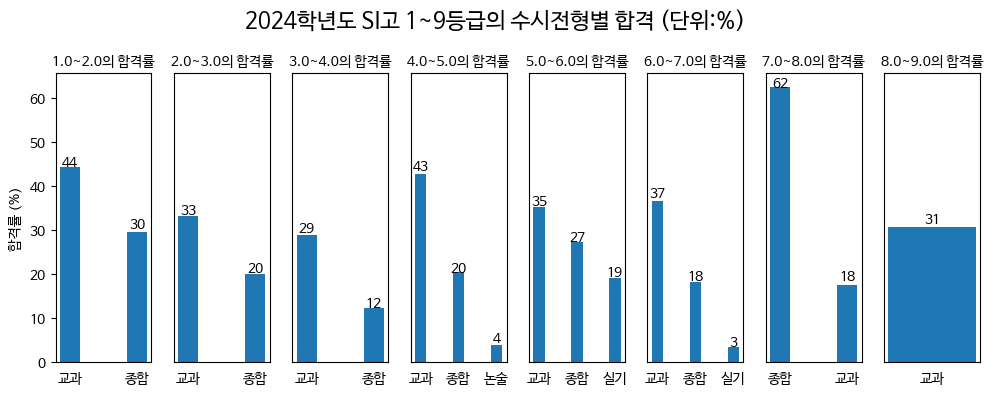

In [ ]:
#내신등급별 수시 전형별 합격률

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 최저 등급과 최고 등급을 입력받기
min_grade = float(input("시작등급을 입력하세요: "))
max_grade = float(input("끝 등급을 입력하세요: "))

# 구간 크기 입력받기
interval_size = float(input("구간 크기를 입력하세요: "))

# 전형분류 값 변경
df['전형분류'] = df['전형분류'].replace({
    '면접위주': '종합',
    '서류위주': '종합',
    '실기위주': '실기',
    '학생부위주': '교과',
    '기타': '종합'
})

# 최저 등급부터 최고 등급까지 구간별로 반복
fig, axes = plt.subplots(1, int((max_grade - min_grade) / interval_size), figsize=(10, 4), sharey=True)  # 서브플롯 생성
for i, grade in enumerate(np.arange(min_grade, max_grade, interval_size)):
    mx = grade + interval_size
    mi = grade

    # mi이상 mx이하 조건을 충족하는 객체 만들기
    df_interval = df[(df.전과목 >= mi) & (df.전과목 < mx) & ~(df.전형분류 == '수능')].copy()

    # '전형분류'별 지원 건수 계산
    grouped = df_interval.groupby('전형분류').size().reset_index(name='지원건수')

    # '전형분류'별 합격 건수 계산
    grouped_pass = df_interval[df_interval['최종'] == '합'].groupby('전형분류').size().reset_index(name='합격건수')

    # 합치기
    grouped = pd.merge(grouped, grouped_pass, on='전형분류')

    # 합격률 계산
    grouped['합격률'] = (grouped['합격건수'] / grouped['지원건수'] * 100).round(2)

    # 그래프를 grouped['합격률'] 값의 내림차순으로 배치
    grouped = grouped.sort_values(by='합격률', ascending=False)

    # Plotting
    ax = axes[i]
    bars = ax.bar(grouped['전형분류'], grouped['합격률'], width=0.3)
    if i == 0:
        ax.set_ylabel('합격률 (%)')  # y 레이블은 첫 번째 서브플롯에만 표시
    ax.set_title(f'{mi}~{mx}의 합격률', fontsize=10)
    ax.set_xticks(np.arange(len(grouped['전형분류']))) # x축 틱 위치 설정
    ax.set_xticklabels(grouped['전형분류'])  # x축 레이블 회전

    # x축 tick 삭제
    ax.tick_params(axis='x',          # 적용할 축
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=True)  # labels along the bottom edge are on

    # y축 tick 삭제
    if i != 0:
        ax.tick_params(axis='y',          # 적용할 축
                    which='both',      # both major and minor ticks are affected
                    left=False,      # ticks along the bottom edge are off
                    right=False,         # ticks along the top edge are off
                    labelleft=False)  # labels along the bottom edge are on

    # 각 막대 위에 값을 표시
    for bar in bars:
        yval = round(bar.get_height())  # 반올림
        ax.text(bar.get_x() + bar.get_width()/2, yval-0.3, yval, ha='center', va='bottom')

# 그래프 제목 추가
plt.suptitle(f'2024학년도 SI고 {int(min_grade)}~{int(max_grade)}등급의 수시전형별 합격 (단위:%)', fontsize=16)

plt.tight_layout()
plt.show()

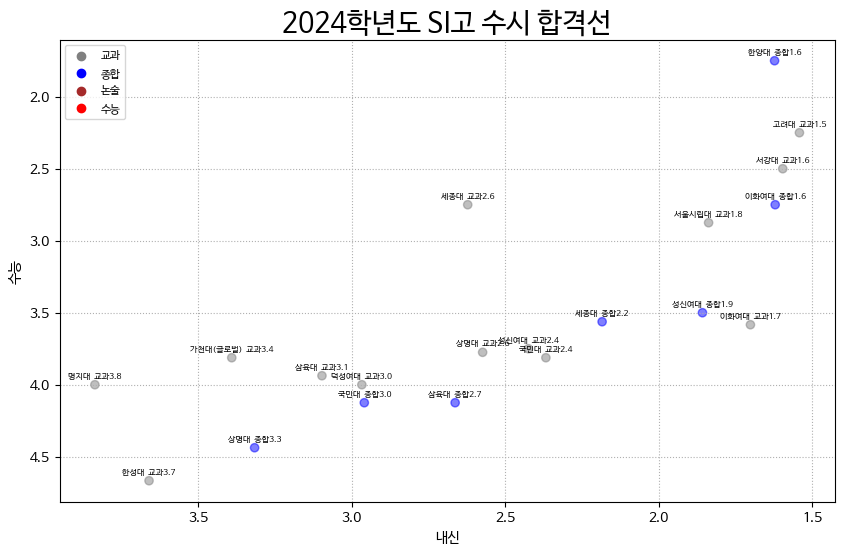

In [53]:
#2. 서울주요대 합격선 요약 그래프

import matplotlib.pyplot as plt
import pandas as pd


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


#대학 리스트
uni = ['고려대', '서강대', '한양대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '숙명여대',
       '국민대', '숭실대', '세종대', '명지대', '상명대', '가천대(글로벌)', '한성대', '삼육대', '성신여대', '덕성여대']


# 4가지 조건: 상위권대, 내신 4등급이상, 수능등급 4등급이상(결측치 학생포함), 합격자
df_filtered = df[ (df['대학'].isin(uni)) & (df['전과목'] <= 4.0) & (df['등급_수능'].isna() <= 4.0) & (df['최종'] == '합')]


#실기전형 제외
df_filtered = df_filtered[df_filtered['전형분류'] != '실기']

# Determine groups with unique and multiple occurrences
group_sizes = df_filtered.groupby(['대학', '전형분류']).size()

# Separate groups based on occurrence
single_occurrences = group_sizes[group_sizes == 1].index
multiple_occurrences = group_sizes[group_sizes > 1].index

# Filter rows for single and multiple occurrences
df_single = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(single_occurrences)]
df_multiple = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(multiple_occurrences)]

# Calculate means for multiple occurrences
df_multiple_mean = df_multiple.groupby(['대학', '전형분류']).agg({'전과목': 'mean', '등급_수능': 'mean'}).reset_index()

# Combine single and multiple occurrence DataFrames
df_combined = pd.concat([df_single, df_multiple_mean])

# Extract relevant columns for plotting
x = df_combined['전과목'].values
y = df_combined['등급_수능'].values
universities = df_combined['대학'].values
admission_types = df_combined['전형분류'].values
subjects_scores = df_combined['전과목'].values  # Extract '전과목' values for annotation

# 조건에 따라 색상 설정
df_combined['color'] = 'gray'
df_combined.loc[df_combined['전형분류'] == '종합', 'color'] = 'blue'
df_combined.loc[df_combined['전형분류'] == '수능', 'color'] = 'red'
df_combined.loc[df_combined['전형분류'] == '논술', 'color'] = 'brown'

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot points with respective colors
plt.scatter(x, y, alpha=0.5, c=df_combined['color'])

# Add labels for each point including '전과목' value
for i, txt in enumerate(universities):
    annotation_text = f"{txt}  {admission_types[i]}{subjects_scores[i]:.1f}"  # Include '전과목' value in annotation
    plt.annotate(annotation_text, (x[i], y[i]+0.05), textcoords="offset points", xytext=(0,10), ha='center', fontsize= 6)


# Add points for ('모집단위' == '약학부') & ('최종' == '합')
#x_special = df_filtered.loc[(df_filtered['모집단위'] == '약학부') & (df_filtered['최종'] == '합'), '전과목']
#y_special = df_filtered.loc[(df_filtered['모집단위'] == '약학부') & (df_filtered['최종'] == '합'), '등급_수능']
#plt.scatter(x_special, y_special, c='gray')


# Add '약학부' text to the special points
#for i in range(len(x_special)):
    #plt.text(x_special.iloc[i]-0.02, y_special.iloc[i]+0.07, '약학부', fontsize=6)

plt.title('2024학년도 SI고 수시 합격선', fontsize=20)
plt.xlabel('내신')
plt.ylabel('수능')

# Reverse x-axis and y-axis for original plot orientation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Add dashed grid lines for readability
plt.grid(True, linestyle=':')

# Create legend for admission types
plt.scatter([], [], color='gray', label='교과')
plt.scatter([], [], color='blue', label='종합')
plt.scatter([], [], color='brown', label='논술')
plt.scatter([], [], color='red', label='수능')


# Show legend
plt.legend(loc='upper left', fontsize=8)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)


#저장
path1 = '/content/drive/MyDrive/python/guam/result_png/'
path2 = '/content/drive/MyDrive/python/guam/result_pdf/'


#plt.savefig(f'{path1}pass_2024_구암고_수시합격선.png')
#plt.savefig(f'{path2}pass_2024_구암고_수시합격선.pdf')

# Show plot
plt.show()

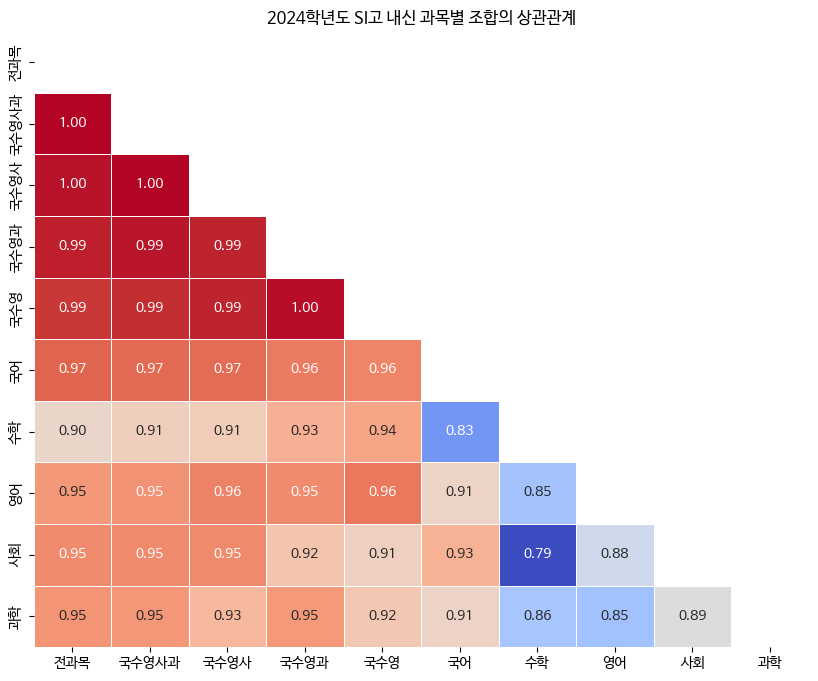

In [54]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# '-' 문자열을 NaN으로 변환하고 숫자로 변환 가능한 값만 남김
df_heatmap = df[['전과목', '국수영사과', '국수영사', '국수영과', '국수영', '국어', '수학', '영어', '사회', '과학']].replace('-', np.nan).apply(pd.to_numeric, errors='coerce')

# 상관계수 계산
corr = df_heatmap.corr()

# 대각행렬 오른쪽 부분을 마스킹 (대각선을 포함한 오른쪽 상단 부분을 제외)
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기 (마스크 적용, 컬러바 생략)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, cbar=False)
plt.title('2024학년도 SI고 내신 과목별 조합의 상관관계')

plt.show()

In [ ]:
df.groupby('전형분류').size()


,0
전형분류,
교과,378
기타,2
논술,68
면접위주,10
서류위주,4
실기,58
실기위주,12
종합,184
학생부위주,149


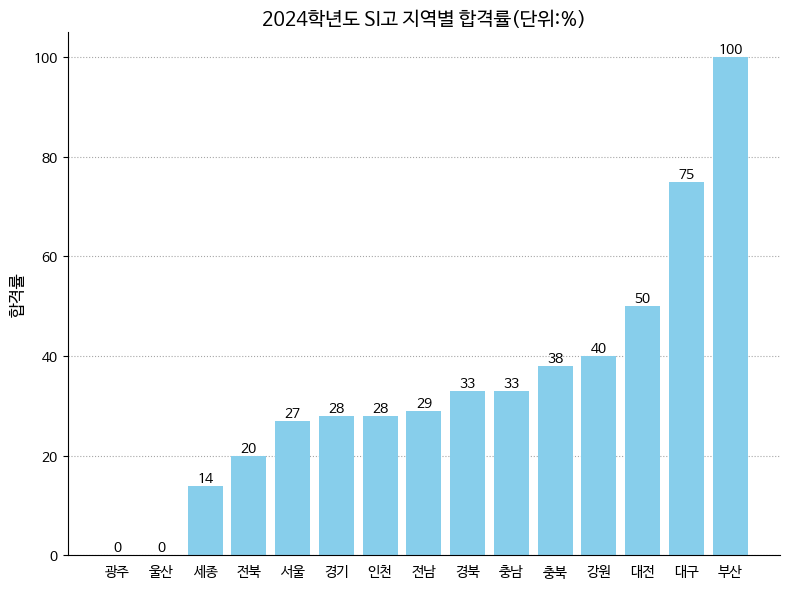

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# 지역별로 최종 열의 빈도 계산
result = df.groupby(['지역', '최종']).size().unstack(fill_value=0)

# '합격률' 열 추가 (합 수 / (합 수 + 불 수))
result['합격률(%)'] = result['합'] / (result['합'] + result['불']) * 100

# 합격률을 반올림하여 정수로
result['합격률(%)'] = result['합격률(%)'].round().astype(int)

# 합격률에 따라 오름차순으로 정렬
result_sorted = result.sort_values(by='합격률(%)')

# 세로형 막대그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(result_sorted.index, result_sorted['합격률(%)'], color='skyblue')

# 막대에 값 표시
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height()}', ha='center', va='bottom')

# 그래프의 일부 테두리선 제거
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 위쪽 테두리 제거
ax.spines['right'].set_visible(False)  # 오른쪽 테두리 제거

# 왼쪽 텍스트에서 가로 점선 그리기
ax.yaxis.grid(True, linestyle=':', color='gray', alpha=0.7)
ax.set_axisbelow(True)  # 점선을 막대 뒤로 보내기

# 그래프 제목 및 레이블 설정
plt.title('2024학년도 SI고 지역별 합격률(단위:%)', fontsize=14)
plt.ylabel('합격률', fontsize=12)
#plt.xlabel('지역', fontsize=12)


# x축의 tick 제거
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom= True)

# 레이아웃 조정 및 그래프 출력
plt.tight_layout()
plt.show()

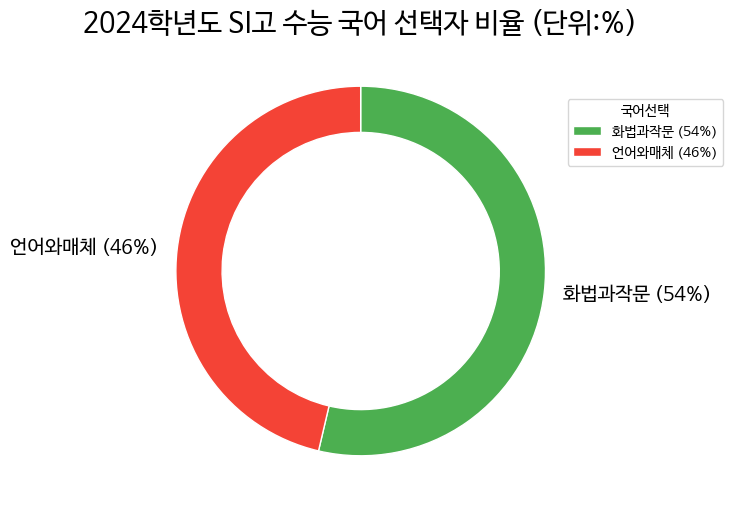

In [60]:
#62. 국어 선택자 비율

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')

# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['국어_국어영역'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create labels that include both the category name and percentage
labels_with_pct = [f'{label} ({pct:.0f}%)' for label, pct in zip(df_tamgu_count.index, df_tamgu_pct)]

# Create a half doughnut plot with labels and percentage in the labels
wedges, labels = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.25, 'edgecolor': 'white', 'linewidth': 1}, startangle=90, counterclock=False, labels=labels_with_pct, textprops={'fontsize': 14})

# Add a title and legend
ax.set_title('2024학년도 SI고 수능 국어 선택자 비율 (단위:%)', fontsize=20)
ax.legend(title='국어선택', loc='center right', bbox_to_anchor=(0.8, 0.3, 0.5, 1))

# Show the plot
plt.show()

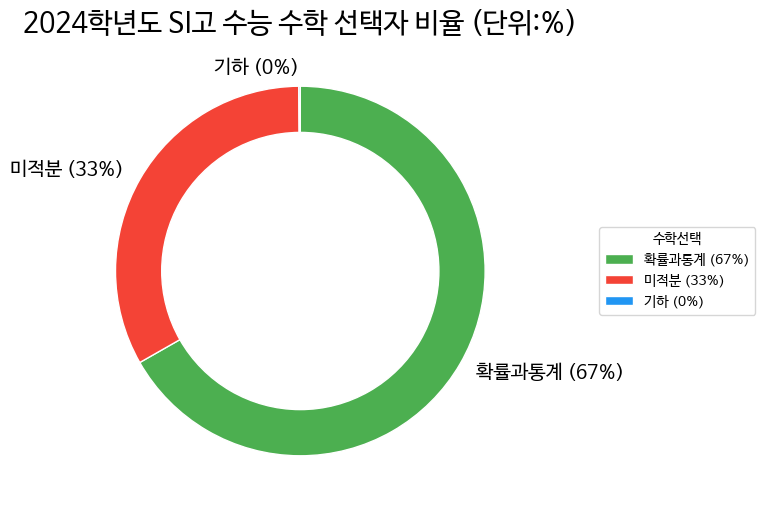

In [61]:
#62. 수학_수학영역 선택자 비율

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['수학_수학영역'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create labels that include both the category name and percentage
labels_with_pct = [f'{label} ({pct:.0f}%)' for label, pct in zip(df_tamgu_count.index, df_tamgu_pct)]

# Create a half doughnut plot with labels and percentage in the labels
wedges, labels = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.25, 'edgecolor': 'white', 'linewidth': 1}, startangle=90, counterclock=False, labels=labels_with_pct, textprops={'fontsize': 14})

# Add a title and legend
ax.set_title('2024학년도 SI고 수능 수학 선택자 비율 (단위:%)', fontsize=20)
ax.legend(title='수학선택', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

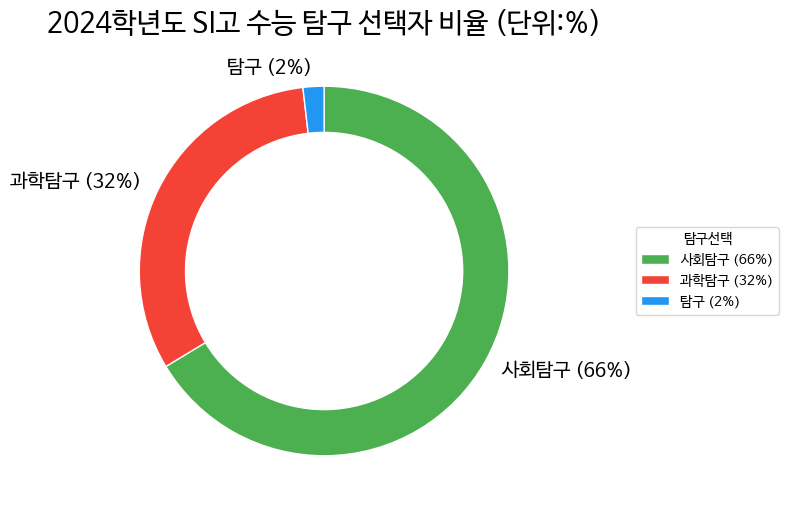

In [62]:
#62. 탐구영역 선택자 비율

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate the percentage of each variable in the '탐구영역' column
df_tamgu_count = df['탐구영역'].value_counts()
df_tamgu_pct = df_tamgu_count / df_tamgu_count.sum() * 100

# Define colors for each variable
colors = ['#4CAF50', '#F44336', '#2196F3', '#FFEB3B']

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 6))

# Create labels that include both the category name and percentage
labels_with_pct = [f'{label} ({pct:.0f}%)' for label, pct in zip(df_tamgu_count.index, df_tamgu_pct)]

# Create a half doughnut plot with labels and percentage in the labels
wedges, labels = ax.pie(df_tamgu_pct, colors=colors, wedgeprops={'width': 0.25, 'edgecolor': 'white', 'linewidth': 1}, startangle=90, counterclock=False, labels=labels_with_pct, textprops={'fontsize': 14})

# Add a title and legend
ax.set_title('2024학년도 SI고 수능 탐구 선택자 비율 (단위:%)', fontsize=20)
ax.legend(title='탐구선택', loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

In [63]:
#66. 탐구 선택과목 트리맵

import pandas as pd
import plotly.express as px



##  데이터 부르기
path = '/content/drive/MyDrive/python/sindo/'
df = pd.read_excel(f'{path}sindo_2024.xlsx')


df_new = df[['선택1_과목명', '선택2_과목명', '선택1_백분위', '선택2_백분위']].dropna()
df_new1 = pd.melt(df_new, value_vars=['선택1_과목명', '선택2_과목명'], var_name='electives_tamgu')
df_new2 = pd.melt(df_new, value_vars=['선택1_백분위', '선택2_백분위'], var_name='percentile_tamgu')
df_new3 = pd.concat([df_new1, df_new2], axis=1)
df_new3.columns = ["선택탐구12", "탐구과목명", "백분위탐구12",  "백분위점수"]
df_new3 = df_new3[['탐구과목명']]
df_counts = df_new3['탐구과목명'].value_counts().reset_index()
df_counts.columns = ['탐구과목명', 'count']

# Create the treemap plot
fig = px.treemap(df_counts, path=['탐구과목명'], values='count')
fig.update_traces(textfont=dict(size=30))


# Update the title font size
# Set the font size of the title
fig.update_layout(
    title_font_size = 35,
    title={
        'text': '2024학년도 SI고 선택과목 현황',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top' })


# Save the plot as a PNG image using the kaleido engine
#path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
#fig.write_image(f'{path}E고탐구선택2024_tree.png', engine='kaleido')

#save it as a html 파일
#fig.write_html(f'{path}E고탐구선택2024_tree.html')

# Save the plot as a PDF file
#fig.write_image(f'{path}E고탐구선택2024_tree.pdf', format='pdf', engine='kaleido')

# Show the plot
fig.show()

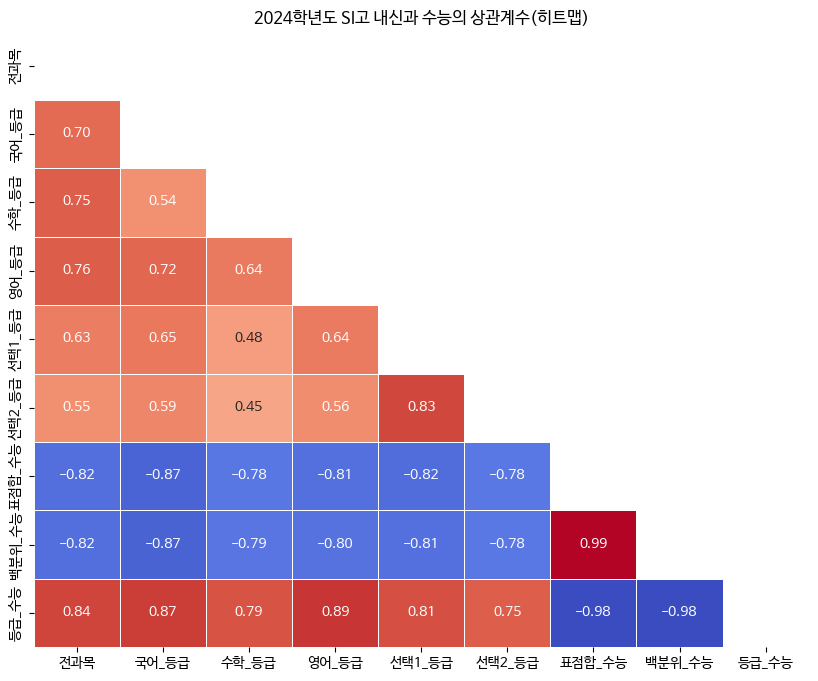

In [2]:
#내신과 수능과 상관관계(히트맵)

import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합_수능',  '백분위_수능',  '등급_수능']]


# 상관계수 계산
corr = df_heatmap.corr()


# 대각행렬 오른쪽 부분을 마스킹 (대각선을 포함한 오른쪽 상단 부분을 제외)
mask = np.triu(np.ones_like(corr, dtype=bool))


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, cbar=False)
plt.title('2024학년도 SI고 내신과 수능의 상관계수(히트맵)')


plt.show()